#CS 1090a Project: Evolution of NYT Headlines Over the Last Century

**By Chris Li, Drake Du, Dai Pham, Mohamed Cassim, Zainab Zarnish**

**Table of Contents**
- [Problem Statement and Motivation](##problem-statement-and-motivation)
- [Description of Data, EDA](#eda-and-final-project-goals)
- [Model Training and Analysis](#model-training-and-analysis)
- [Results](#results)
- [Conclusion and Further Improvements](#conclusion-and-further-improvements)


Website containing EDA and sentiment analysis visualization for joint CS 1710 project (running instructions located in the `README` file): [Link](https://drive.google.com/file/d/1K9mDeci0V_OEh9Fp_YjtwYFtbTH2a1Mj/view?usp=drive_link)

##Problem Statement and Motivation

###Motivation:
Over the past century, the New York Times has been a leading source of news, covering pivotal events, societal trends, and evolving topics that reflect changes in world.

We received article data from two datasets: one consisting of article headlines from 1920 to 2020, and another containing articles from 1990-2020, containing already-classified news desks for each article.

The purpose of this project is to analyze NYT headlines over the last century to uncover:
- How sentiment in headlines has changed over time (positive, negative, neutral).
- The evolution of specific news topics and their representation.
- Patterns between different news desks (e.g., "Sports", "Metro", "Opinion") and headline sentiment.

###Problem Statement:

How have New York Times headline themes/news desks, as well as the overall sentiment of article headlines evolved over time?


In [ ]:
import pandas as pd
import glob
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#EDA and Final Project Goals

The goal of the EDA is to identify patterns and trends in the dataset that provide useful insights from the raw headline data and news desk classifications.

### Trends Over Time
- **Headline Count**: Visualization of the number of headlines published each year to identify trends in journalistic output.

### Sentiment by News Desk
- Sentiment distributions for the top five `news_desk` categories:
  - "Business"
  - "Metro"
  - "Sports"
  - "Opinion"
  - "Other"

This analysis helps to uncover which desks are more positive or negative over time.

### Word Frequency Analysis
- **Most Frequent Words**: Identification of common words in headlines using word clouds and frequency plots.
- **Topic Evolution**: Changes in word frequency over decades, highlighting emerging and declining topics.


In [ ]:


# Use glob to find all CSV files in the specified range
all_files = glob.glob("/content/drive/My Drive/NYT_data/data1/new_york_times_stories_*.csv")

# Initialize an empty list to store each DataFrame
df_list = []

# Loop through all files and append each one to the list
for filename in all_files:
    df = pd.read_csv(
        filename,
        dtype={
            'print_page': 'str',  # Converting print_page to string
            'word_count': 'float',  # Converting word_count to float
            # 'year': 'int'  # Converting year to float if it's not consistent
        },
        low_memory=False
    )
    df_list.append(df)


# Concatenate all DataFrames into a single DataFrame
df1 = pd.concat(df_list, ignore_index=True)
df.head()

After quickly glancing over the data, we realized there were simply too many types of news desk values for efficient classification (as many news desks were redundant or misspelled), so we manually mapped these values to more general, broad categories.


In [ ]:
# Comprehensive mapping dictionary to standardize `news_desk` values without cascading
news_desk_mapping = {
    # Business-related terms
    "Business": "Business", "Business Desk": "Business", "Business/Financial Desk": "Business",
    "Money and Business/Financial Desk": "Business", "Financial Desk": "Business",
    "Money & Business/Financial Desk": "Business", "Business/Your Money": "Business",
    "Business/Media & Advertising": "Business", "Business/World Business": "Business",
    "Finance Desk": "Business", "BIZ": "Business", "StateByState": "Business", "Business Financial Desk": "Business",
    "Business / Worldbusiness": "Business", "Financial DeskFinancial Desk": "Business",
    "Money and Business/Financial DeskMoneyand Bus": "Business", "E-Business": "Business",
    "Dealbook": "Business", "Summary": "Business", "Your Money": "Finance", "Business World Magazine": "Business",
    "SundayBusiness": "Business", "Outlook": "Business", "Financial Planning Guide: Your Taxes": "Finance",
    "Business Day": "Business", "Business / Media & Advertising": "Business", "Business / Your Money": "Business",
    "Business / Business Special": "Business", "Business Travel": "Business", "Retail": "Business",
    "Small Business": "Business", "E-Commerce": "Business", "Workplace": "Business",

    # Metropolitan-related terms
    "Metropolitan Desk": "Metro", "Metro": "Metro", "Metropolitian Desk": "Metro",
    "Metropoltian Desk": "Metro", "Metroplitan Desk": "Metro", "Metropolitan desk": "Metro",
    "CityWeekly": "Metro", "New York Region / New York Region Special": "Metro",
    "The City Weekly Desk": "Metro", "New York Region": "Metro", "The City Desk": "Metro",
    "Metropolitan Desk Section D": "Metro", "Metrpolitan Desk": "Metro", "Metroploitian Desk": "Metro",
    "qMetropolitan Desk": "Metro", "Metro Desk": "Metro", "The City": "Metro",
    "Metropolitan": "Metro", "New York Region / The City": "Metro", "New York Region / Metro Campaigns": "Metro",

    # Sports-related terms
    "Sports": "Sports", "Sports Desk": "Sports", "Sports / Baseball": "Sports",
    "Sports / Pro Football": "Sports", "Sports / Soccer": "Sports", "Sports / Other Sports": "Sports",
    "Sports/Hockey": "Sports", "Sports/College Football": "Sports", "Sports/Baseball": "Sports",
    "Sports / Play Magazine": "Sports", "Other Sports": "Sports", "Sports / Othersports": "Sports",
    "The Marathon": "Sports", "Play": "Sports", "Sports DeskSports Desk": "Sports", "Sports Special": "Sports",
    "Sports / Tennis": "Sports", "Sports / Olympics": "Sports", "Sports / College Basketball": "Sports",
    "Sports / Hockey": "Sports", "Sports / Golf": "Sports", "Sports/Pro Football": "Sports",
    "Sports / Winter Olympics 2006": "Sports", "Sports / Soccer": "Sports", "Sports / More Sports": "Sports",
    "Sports/Tennis": "Sports", "Adventure Sports": "Sports", "Other Sports / Other Sports": "Sports",
    "Sports / Pro Basketball": "Sports", "Sports / College Football": "Sports", "Olympics": "Sports",

    # Arts and Culture terms
    "Arts": "Arts", "The Arts/Cultural Desk": "Arts", "Cultural Desk": "Arts", "Culture": "Arts",
    "Arts & Leisure Desk": "Arts", "Art & Ideas/Cultural Desk": "Arts", "Arts / Art & Design": "Arts",
    "Arts/Music": "Arts", "The Arts": "Arts", "Arts&Leisure": "Arts", "Arts & Ideas/Cultural Desk": "Arts",
    "Arts / Music": "Arts", "Movies": "Arts", "Movies, Performing Arts/Weekend Desk": "Arts",
    "Movies / Red Carpet": "Arts", "Arts / Dance": "Arts", "Theater": "Arts", "T: Living Magazine": "Arts",
    "Theater Desk": "Arts", "Fashions of The Times Magazine": "Arts", "Movies / Movies Special": "Arts",
    "Arts / Television": "Arts", "Arts / Arts Extra": "Arts", "Arts / Theater": "Arts",
    "The Arts\Cultural Desk": "Arts", "Arts Almanac Supplement": "Arts", "Arts Special/Arts Special": "Arts",
    "Arts/Theater": "Arts", "Arts/Art & Design": "Arts", "Arts/Dance": "Arts", "Television": "Arts",

    # Opinion and Editorial terms
    "Opinion": "Opinion", "Editorial Desk": "Opinion", "Editorial": "Opinion", "OpEd": "Opinion",
    "Letters": "Opinion", "Opinion / Opinion Special": "Opinion", "Editorial desk": "Opinion",
    "Op-Ed at 20 Supplement": "Opinion", "Opinion / N.Y. Region Opinions": "Opinion",
    "Opinion TimesSelect": "Opinion", "Reader Center": "Opinion", "The Upshot": "Opinion", "Our Times": "Opinion",
    "Sunday Review": "Opinion", "Readers' Opinions": "Opinion", "New York/Region Opinions / New York/Region Opinions": "Opinion",
    "Editorials/Op-Ed": "Opinion", "Opinions": "Opinion", "opinion": "Opinion",

    # Science terms
    "Science": "Science", "Science Desk": "Science", "Science Desk;": "Science",
    "Science / Space & Cosmos": "Science", "SCI": "Science", "Science / Science Special": "Science",
    "Health / Genetics": "Science", "Health & Fitness Desk": "Science", "The Natural World": "Science",
    "Science / Environment": "Science", "Science Special Report": "Science", "Space & Cosmos": "Science",
    "Health and Fitness": "Science", "Science / Life Science": "Science", "Science / Space": "Science",
    "Science Special Report / Science Special Report": "Science", "Environment": "Science",

    # Magazine terms
    "Magazine": "Magazine", "Magazine Desk": "Magazine", "Magazine / Magazine Special": "Magazine",
    "T Magazine": "Magazine", "T: Travel Magazine": "Magazine", "T: Women's Fashion Magazine": "Magazine",
    "T: Men's Fashion Magazine": "Magazine", "Men's Fashions of The Times Magazine": "Magazine",
    "Men's Fashions of The TimesMagazine": "Magazine", "The Good Health Magazine": "Magazine",
    "Magazine DeskMetropolitan Desk": "Magazine", "Men's Fashion of the Times Magazine": "Magazine",
    "Men's Fashion of The Times Magazine": "Magazine", "Home Design Magazine": "Magazine",
    "Home Design MagazineHome Design Magazine": "Magazine",

    # National terms
    "National": "National", "National Desk": "National", "National Desk;": "National",
    "National / National Special": "National", "NAT": "National", "National Dsek": "National",
    "Natioanl Desk": "National", "National Edition": "National", "StateByState": "National", "U.S.": "National",
    "National - Bulldog": "National", "National desk": "National", "National / U.S.": "National",
    "National DeskNational Desk": "National", "National / Class": "National",
    "National / California Recall": "National", "National / Threats and Responses": "National",

    # Foreign-related terms
    "Foreign": "Foreign", "Foreign Desk": "Foreign", "Foreign desk": "Foreign",
    "International": "Foreign", "International / Middle East": "Foreign",
    "International / Africa": "Foreign", "Foriegn Desk": "Foreign", "International / Europe": "Foreign",
    "World": "Foreign", "Universal": "Foreign", "International Style": "Foreign",
    "International / Asia Pacific": "Foreign", "International / Americas": "Foreign",
    "International / After the War": "Foreign", "International / International Special": "Foreign",
    "International/Africa": "Foreign", "International/Europe": "Foreign", "International/Middle East": "Foreign",
    "International / Asia Pacific": "Foreign", "International / International Special": "Foreign",

    # Real Estate terms
    "Real Estate": "Real Estate", "RealEstate": "Real Estate", "Real Estate Desk": "Real Estate",
    "Real Estate / Luxury & Vacation": "Real Estate", "Real Estate desk": "Real Estate", "REA": "Real Estate",
    "Real Estate / Real Estate Luxury & Vacation": "Real Estate", "Commercial Real Estate Report": "Real Estate",
    "Real Estate/Real Estate Luxury & Vacation": "Real Estate", "Automobiles": "Real Estate",

    # Dining-related terms
    "Dining": "Dining", "Dining In, Dining Out/Style Desk": "Dining", "Dining & Wine": "Dining",
    "Dining In, Dining Out": "Dining", "Dining & Wine / Cooking": "Dining", "Dining In, Dining Out/Cultural Desk": "Dining",
    "Food": "Dining", "Food & Dining": "Dining", "Dining & Wine / Dining & Wine": "Dining",
    "Dining in, Dining out/Style Desk": "Dining", "Dining In/Dining Out": "Dining",
    "Dining In/Dining Out/Living Desk": "Dining", "Dining In, Dining Out/Style DeskDining In, Din": "Dining",

    # Lifestyle-related terms
    "Lifestyle": "Lifestyle", "Living Desk": "Lifestyle", "Styles": "Lifestyle", "Style Desk": "Lifestyle",
    "Fashion & Style": "Lifestyle", "Style": "Lifestyle", "Fashion": "Lifestyle", "TStyle": "Lifestyle",
    "Living DeskLiving Desk": "Lifestyle", "Living Desk;": "Lifestyle", "Living DeskStyle Desk": "Lifestyle",
    "House & Home/Style Desk": "Lifestyle", "House & Home\Style Desk": "Lifestyle",
    "Styles of the Times": "Lifestyle", "Styles of The TimesStyles of The Times": "Lifestyle",
    "Home": "Lifestyle", "Home Desk": "Lifestyle", "Home Design Desk": "Lifestyle", "Home Design Magazine": "Lifestyle",
    "Leisure/Weekend Desk": "Lifestyle", "Smarter Living": "Lifestyle", "TBeauty": "Lifestyle",
    "Thursday Styles": "Lifestyle", "Thursday Styles Desk": "Lifestyle", "Fashion & Style / Sunday Styles": "Lifestyle",
    "TWomensFashion": "Lifestyle", "T: Beauty": "Lifestyle", "Men & Health": "Lifestyle",
    "Women's Health": "Lifestyle", "Men's Health": "Lifestyle", "Style / T: Style Magazine": "Lifestyle",
    "Style of The Times": "Lifestyle", "Style and Entertaining Magazine": "Lifestyle",
    "Style and Entertaining MagazineStyle and Enter": "Lifestyle", "Home & Garden": "Lifestyle",
    "Good Health Magazine": "Lifestyle", "House and Home Style": "Lifestyle", "Fashion & Styles": "Lifestyle",
    "Society": "Lifestyle", "Society Desk": "Lifestyle", "Living Section": "Lifestyle",
    "Parenting": "Lifestyle", "Fashion & Style/Weddings": "Lifestyle",

    # Travel terms
    "Travel": "Travel", "Travel Desk": "Travel", "TTravel": "Travel", "Travel / Escapes": "Travel",
    "Great Homes & Destinations": "Travel", "Escapes": "Travel", "T: Travel Magazine": "Travel",
    "Travel / Sunday Travel": "Travel", "Travel / Sophisticated Traveler": "Travel", "Vacation": "Travel",
    "Summer Times Supplement": "Travel", "Autumn Times Supplement": "Travel", "Winter Times Supplement": "Travel",

    # Review and Books terms
    "Book Review": "Book Review", "Books": "Book Review", "Books / Sunday Book Review": "Book Review",
    "Books / Best-Seller Lists": "Book Review", "Books / First Chapters": "Book Review", "Books/Sunday Book Review": "Book Review",
    "BooksReview": "Book Review", "Books/First Chapters": "Book Review", "Books / Books Special": "Book Review",

    # Week in Review terms
    "Week in Review": "Week in Review", "Week in Review Desk": "Week in Review",
    "Week In Review Desk": "Week in Review", "Week in Review desk": "Week in Review",
    "WeekInReview": "Week in Review", "Weekin Review Desk": "Week in Review",
    "Week In Review DeskWeek In Review Desk": "Week in Review", "Week in Review Deskn": "Week in Review",

    # Other general categories
    "Health": "Health", "Health Desk": "Health", "Health & Fitness": "Health", "Health / Psychology": "Health",
    "Obituary": "Obituary", "Obits": "Obituary", "Corrections": "Corrections", "Politics": "Politics",
    "Education": "Education", "Games": "Games", "Crosswords & Games": "Games", "Technology": "Technology",
    "Circuits": "Technology", "Technology / Circuits": "Technology", "Television": "Arts", "Watching": "Television",
    "News": "News", "NYT Now": "News", "ContinuousNews": "News", "Summary": "News",
    "Special Section": "SpecialSections", "Multimedia": "Media", "Blogs": "Media",
    "Member Center / Site Help": "Member Center", "Member Center": "Member Center",
    "Podcasts": "Media", "Times Insider": "Media", "Times Talks": "Media", "Multimedia/Photos": "Media",
    "International Home": "Media", "Live": "Media", "Homepage": "Media", "nytfrontpage": "Media",
    "Classified": "Classified", "Classfied": "Classified", "Classifed": "Classified",
    "Weekend": "Weekend", "Weekend Desk": "Weekend", "Weekend DeskWeekend Desk": "Weekend",
    "SpecialSections": "SpecialSections", "New Jersey Weekly Desk": "Regionals", "Connecticut Weekly Desk": "Regionals",
    "Westchester Weekly Desk": "Regionals", "Long Island Weekly Desk": "Regionals", "Regionals": "Regionals",
    "The City Weekly/Queens": "Regionals", "Westchester": "Regionals", "LongIsland": "Regionals",
    "NewJersey": "Regionals", "New Jersey": "Regionals", "Connecticut": "Regionals", "Photo": "Media",
    "AtHome": "Media", "International Special / International Special": "Foreign",
    "International / International Special": "Foreign", "Investigative": "News", "Washington": "Politics",
    "Washington / Campaign 2004": "Politics", "Washington / Times on the Trail": "Politics",
    "Washington / Washington Special": "Politics", "Washington / Election 2004": "Politics",
    "Politics / Campaigns": "Politics", "Washington / On the Trail Columns": "Politics",
    "New York Today": "News", "College": "Education", "College / College Specials": "Education",
    "Education / Education Life": "Education", "Education Life Supple": "Education", "Test": "Education",
    "College / Faculty": "Education", "College / Students": "Education", "Health / Health Care Policy": "Health",
    "Health / Anatomy": "Health", "Health & Fitness Desk": "Health",
}

# List of irrelevant or nonsensical `news_desk` entries to be filtered out
irrelevant_terms = [
    "0", "Metropolitan Desk;", "Sophisticated Traveler Magazine", "Business / World Business", "NewsDesk", "Job Market",
    "Obituaries", "WEB", "National / Portraits of Grief", "Cars", "Giving", "Financial Desk;", "The Learning Network",
    "Museums", "Technology / Pogues Posts", "Gender", "A Nation Challenged", "FOR", "TCulture", "NODESK", "THoliday",
    "CUL", "Home Desk;", "Admin", "Automobiles / Automobiles Special", "Entertaining Magazine", "Video", "The Millennium",
    "Burst", "Spring Times Supplement", "A Nation at War / A Nation at War", "Business\\Financial Desk",
    "Business/FinancialDesk", "Working", "BKS", "Home DeskHome Desk", "classified", "Then & Now", "TMensFashion",
    "Business/Financial desk", "Classsified", "MAG", "Theater / Theater Reviews", "SPT", "ALS", "New York Region / New York/Region Special",
    "Nesting", "Holiday Times Supplement", "The City / The City", "Neediest", "International/Asia Pacific", "STL", "NYTI",
    "Boston 2004", "MET", "Favorites", "SundayReview", "Entrepreneurs", "Guides", "Play Magazine", "Money and Business/Financial DeskMoney and Bus",
    "Summer Movies", "Cultural Desk - SummerTimes Supplement", "Generations", "Wireless Living", "CND", "Your Taxes Supplement",
    "World of New York Magazine", "Editors Picks", "The Business of Green", "Home Entertaining Magazine", "Teens", "Voter Guide 2004",
    "Flight", "NYTimes.com Digital", "Internationa / International Special", "Fashion & Style/Weddings & Celebrations", "Sports/Golf",
    "Business/Financial", "TheCity Weekly Desk", "nationchallenged", "Variables.metaSubSection", "Portraits of Grief", "Money andBusiness/Financial Desk",
    "At Home", "EDT", "/", "Fashion & Style / Thursday Styles", "Booming", "Moneyand Business/Financial Desk", "Other Sports/Other Sports",
    "Careers Supplement", "Movies / Oscars 2004", "The Year In Pictures", "2005: The Year In Pictures", "International/Americas",
    "Sports DEsk", "S­ÎQ'ôp", "Sport Desk", "Theater / Theater", "Theater / News & Features", "Graphics", "Business/Finacial Desk",
    "sports", "Metropolitan Dsk", "Science / Science Special Report", "Arts & Leisure", "Metropolitain Desk", "Business/Financial DeskBusiness/Financial Desk",
    "Long Island Weekly", "Automoblies", "Technology/Circuits", "New York/Region Opinions / New York/ Region Opinions", "Olympics / Olympics",
    "City Weekly Desk", "technology", "business", "Page 1, Column", "Technology / Technology Special", "Business / Mutual Funds", "timesselect",
    "New York Region/Metro Campaigns", "national", "Arts/Television", "membercenter", "Sunday Business", "Crossword & Games/Crossword/Games",
    "automobiles", "/ Help", "DIN", "ELEC", "science", "Fashion & Style/Weddings", "Metropolian Desk", "Page 3, Column", "The City Weekly",
    "education", "Summer Arts Supplement", "SBN", "Washington / Races To Watch", "Metropolitan DeskMetropolitan Desk", "Crosswords & Games /",
    "Westchester Weekly Deask", "TRA", "SPG", "Weekend Desk;", "politics", "N.Y. / Region", "Automoiles", "Technology / Technology",
    "Business / Your Taxes", "travel", "The City/Weekly Desk", "The City Weekly Deslk", "Financial", "After the War / After the War",
    "Arts and Leisure", "ESC", "Movies, Performing Arts/Weekend DeskMovies, Pe", "Page 4, Column", "Arts Special", "Business Day/Financial",
    "One Hundred Fiftieth Anniversary", "Sports/Soccer", "Automobile Desk", "Automobliles", "New Jersey Weekly DeskEditors' Note Appended",
    "nyregion", "Fashion & Styles / On the Street", "Energy", "Standoff With Iraq / Standoff With Iraq", "Fashions of the Times Magazine",
    "The City Weekly Desk  The City Weekly Desk", "Cultural Desk;", "Connecticut Weekly desk", "An odd bit of text that you could stumble across on Tallmo's Web site puts it",
    "thrombotic thrombocytopenic purpura, which affects the central nervous", "1996, Sunday, Late Edition - Final", "trv", "Arts / Arts Special",
    "DORAL-RYDER OPEN", "Hatch recognized Mr. Abraham in the hearing's waning minutes", "s ATLANTIC COAST CONFERENCE tournament in Rock Hill, S.C., No.",
    "s leaders for", "Page 16, Column", "The Mayor is strapped for money for construction", "his retired jersey, hanging behind one basket, had a better view. Pam,",
    "IHT Finance", "Metropoltan Desk", "Page 17, Column", "as well as members of Prime Minister P. V. Narasimha Rao's Congress",
    "Styles of The Times Desk", "Summer Times Supplementa", "You can't go to Cambodia.  You can't go to northern Burma.", "Televison",
    "National Deskl", "Foreign DEsk", "Movies / Special: Oscars", "\"PROFILE: Elizabeth Peterken McCaughey Ross\"", "Business/Financial Desk Section D",
    "Business/Finance Desk", "Final", "Money and Business/FinancialDesk", "Business/Foreign Desk", "Monet and Business/Financial Desk",
    "The Arts/Cultrual Desk", "Foreign Desk;", "Page 22, Column", "Money and Busines/Financial Desk", "Education Life SupplementMetropolitan Desk",
    "The City Weelky Desk", "Automobilees", "Living Desk  Section C", "About NYTDigital", "Autmobiles", "Critic's Choice", "Springs Times Supplement",
    "Business/Finanical Desk", "Televison Desk", "Metropoliatn Desk", "The Art/Cultural Desk", "SundayBusinessSundayBusiness", "Finanacial Desk",
    "Money and Business/Financial", "(pg. 1)", "Crossword & Games /", "Automoviles", "Member Center", "1;             Foreign Desk",
    "Crosswords & Games / Crosswords/Games", "Arts & Liesure Desk", "Premium Crosswords", "s race on Friday when Rodney Rash, the",
    "Styles of The Times", "Well", "Climate", "Corrections"
]

# Apply the mapping to `news_desk`
df1['news_desk'] = df1['news_desk'].map(news_desk_mapping).fillna('Other')

# Filter out irrelevant rows
df1 = df1[~df1['news_desk'].isin(irrelevant_terms)]

# Display the cleaned category counts
#with pd.option_context('display.max_rows', None):
    #print(df1['news_desk'].value_counts())


The above code is all used as part of data cleanup, with the largest part being the cleanup of news desks, as they appeared to not be standardized, and so we had to manually put many of them into groups, or discard them where this was not possible.

##EDA for Dataframe 1: article data between 1920 and 2020

In [ ]:
# Import additional libraries for EDA.
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Create dataset for EDA specifically.
data = df1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#analyze the shape of the data
print(data.shape)
print(data.dtypes)
print(data['word_count'].describe().astype(int))


#article with largest word count
pd.set_option('display.max_colwidth', None)
max_word = data.loc[data['word_count'] == data['word_count'].max()]
print(max_word['url'])




(2935846, 12)
headline          object
source            object
word_count       float64
url               object
print_section     object
print_page        object
author            object
type              object
pub_date          object
news_desk         object
section           object
year             float64
dtype: object
count    2935844
mean         626
std          669
min            0
25%          163
50%          507
75%          910
max       102439
Name: word_count, dtype: int64
1108580    https://www.nytimes.com/2002/02/26/business/transcript-of-senate-commerce-committee-hearing-on-enron.html
Name: url, dtype: object


KeyboardInterrupt: 

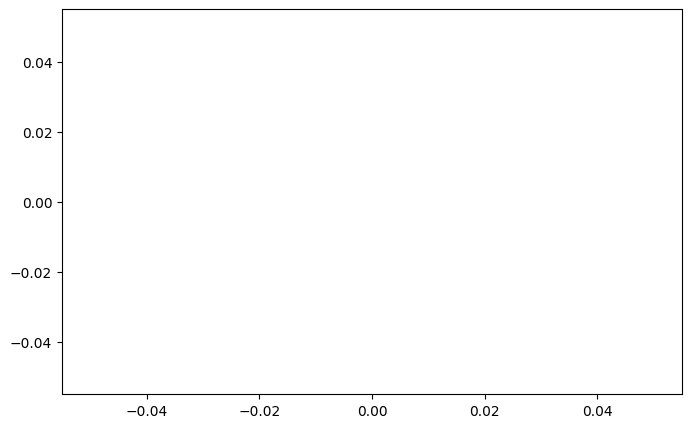

In [ ]:
# Visualize headline length distribution.
data['headline_word_count'] = data['headline'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 5))
sns.histplot(data['headline_word_count'], kde=True)
plt.title("Headline Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


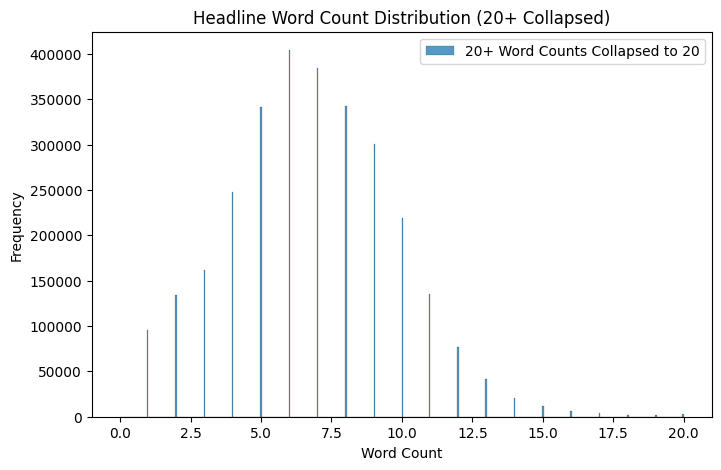

In [ ]:
# Create a new column where word counts of 20+ are collapsed to 20.
data['headline_word_count_collapsed'] = data['headline_word_count'].apply(lambda x: x if x < 20 else 20)

# Visualize the distribution with the collapsed 20+ bucket.
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='headline_word_count_collapsed')
plt.title("Headline Word Count Distribution (20+ Collapsed)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")

# Add a legend explaining the 50+ collapse.
plt.legend(["20+ Word Counts Collapsed to 20"], loc='upper right')
plt.show()


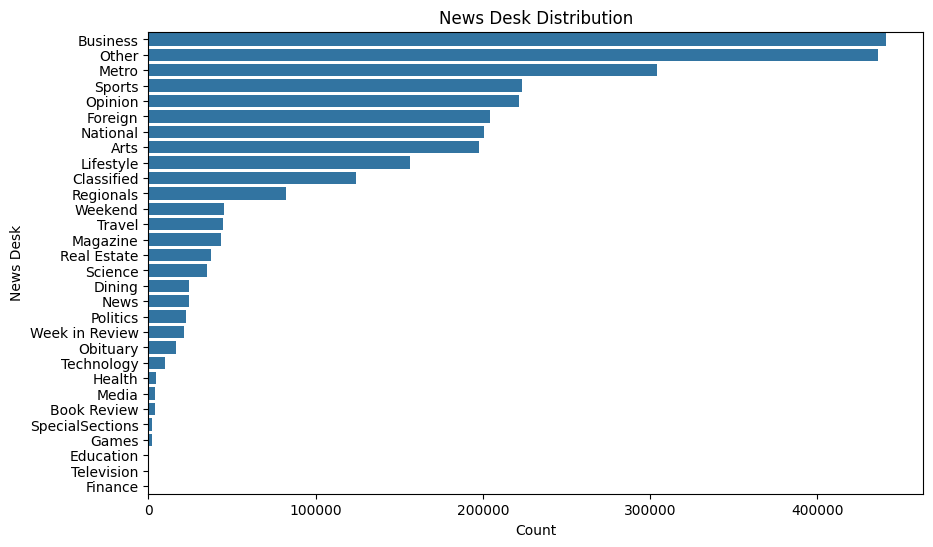

In [ ]:
# Visualize news desk distribution.
plt.figure(figsize=(10, 6))
sns.countplot(y=data['news_desk'], order=data['news_desk'].value_counts().index)
plt.title("News Desk Distribution")
plt.xlabel("Count")
plt.ylabel("News Desk")
plt.show()


<ipython-input-10-dc632edaf04e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = pd.to_numeric(data['year'], errors='coerce')


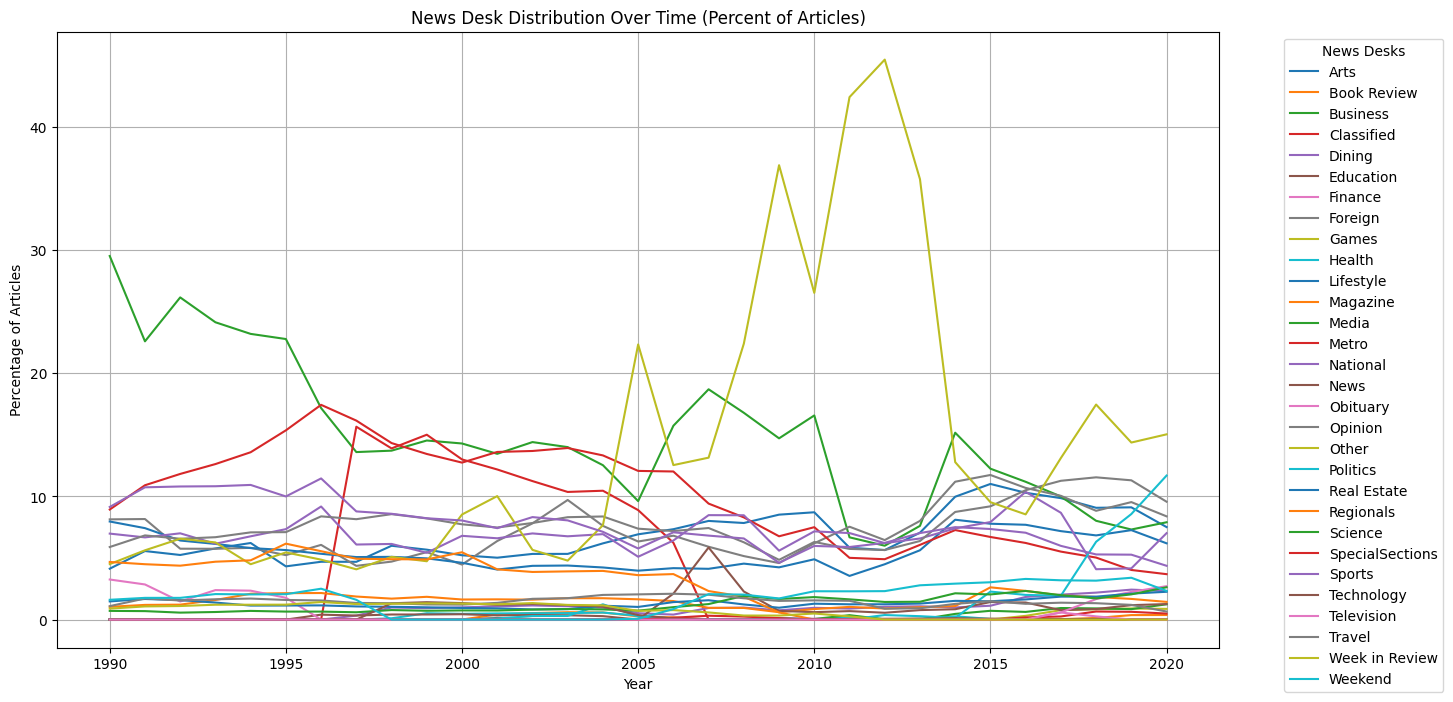

In [ ]:
# Drop rows where 'year' or 'news_desk' is missing.
data = data.dropna(subset=['year', 'news_desk'])

# Ensure the 'year' column is numeric and clean it.
data['year'] = pd.to_numeric(data['year'], errors='coerce')
data = data.dropna(subset=['year'])
data['year'] = data['year'].astype(int)

# Filter data to start of NYT publishing.
filtered_data = data[data['year'] >= 1985]

# Calculate the proportion of each news desk per year.
news_desk_distribution = (
    filtered_data.groupby(['year', 'news_desk'])
    .size()
    .unstack(fill_value=0)
)

# Convert counts to percentages.
news_desk_percentages = news_desk_distribution.div(news_desk_distribution.sum(axis=1), axis=0) * 100
# Plot the line plots for each news desk.
plt.figure(figsize=(15, 8))
for desk in news_desk_percentages.columns:
    plt.plot(
        news_desk_percentages.index,
        news_desk_percentages[desk],
        label=desk
    )
plt.title("News Desk Distribution Over Time (Percent of Articles)")
plt.xlabel("Year")
plt.ylabel("Percentage of Articles")
plt.legend(title="News Desks", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


<Figure size 1500x800 with 0 Axes>

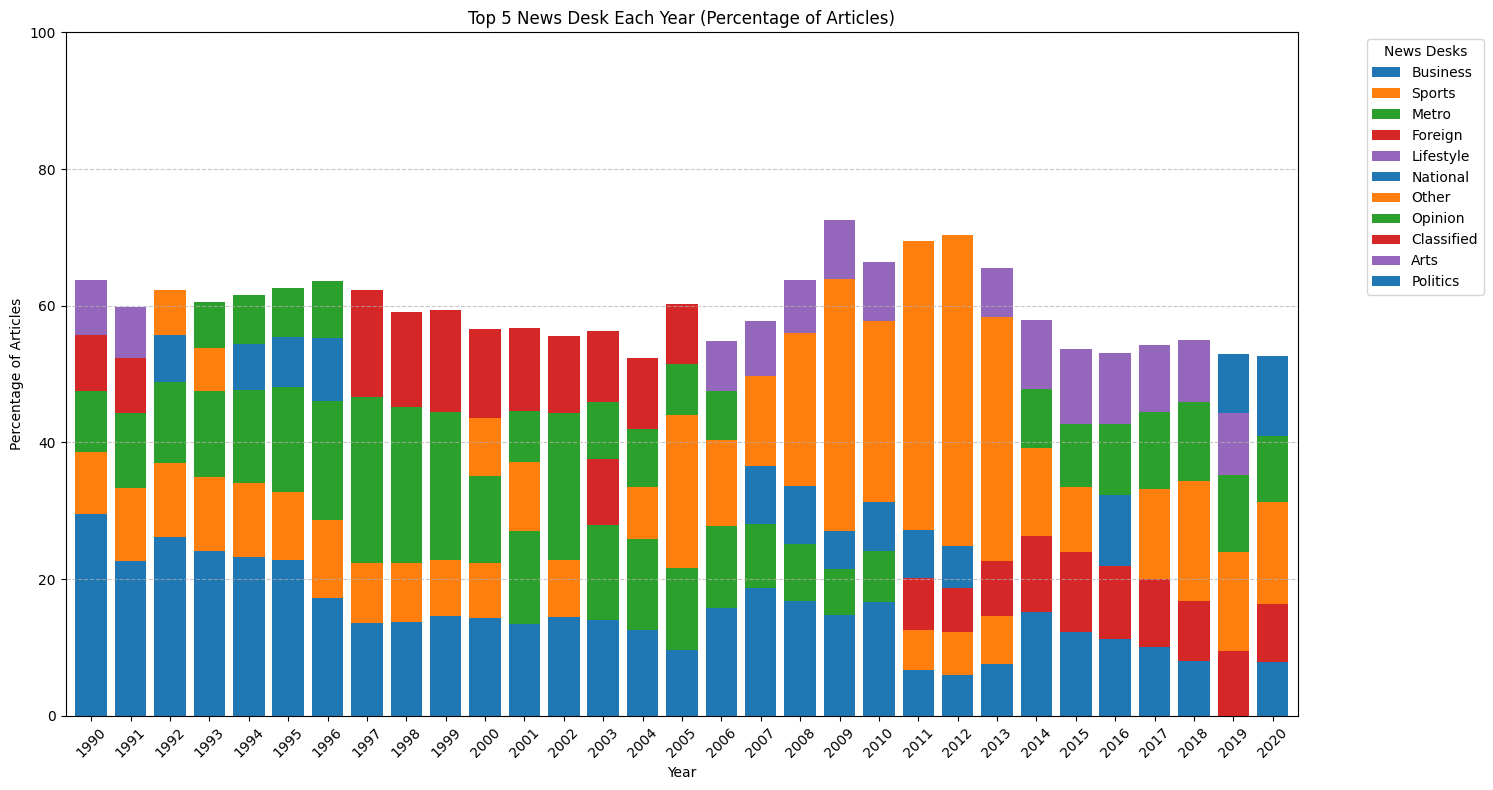

In [ ]:
# Initialize a new DataFrame to store the data for the stacked bar chart.
stacked_data = pd.DataFrame()

# Build the data for stacked bar charts.
for year in news_desk_percentages.index:
    # Get the top 5 news desks for the current year.
    top_5_desks = news_desk_percentages.loc[year].nlargest(5)
    # Add them to the stacked_data DataFrame.
    stacked_data = pd.concat([stacked_data, top_5_desks.rename(year)], axis=1)

# Transpose the DataFrame for plotting.
stacked_data = stacked_data.T.fillna(0)

# Plot the stacked bar chart.
plt.figure(figsize=(15, 8))
stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(15, 8),
    width=0.8,
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
)

# Set the title, labels, and legend.
plt.title("Top 5 News Desk Each Year (Percentage of Articles)")
plt.xlabel("Year")
plt.ylabel("Percentage of Articles")
plt.ylim(0, 100)  # Ensure the y-axis goes from 0 to 100 for percentages.
plt.xticks(rotation=45)

# Add grid lines for better readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="News Desks", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-12-237ef5a345a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_desks['year'] = top_5_desks['year'].astype(int)


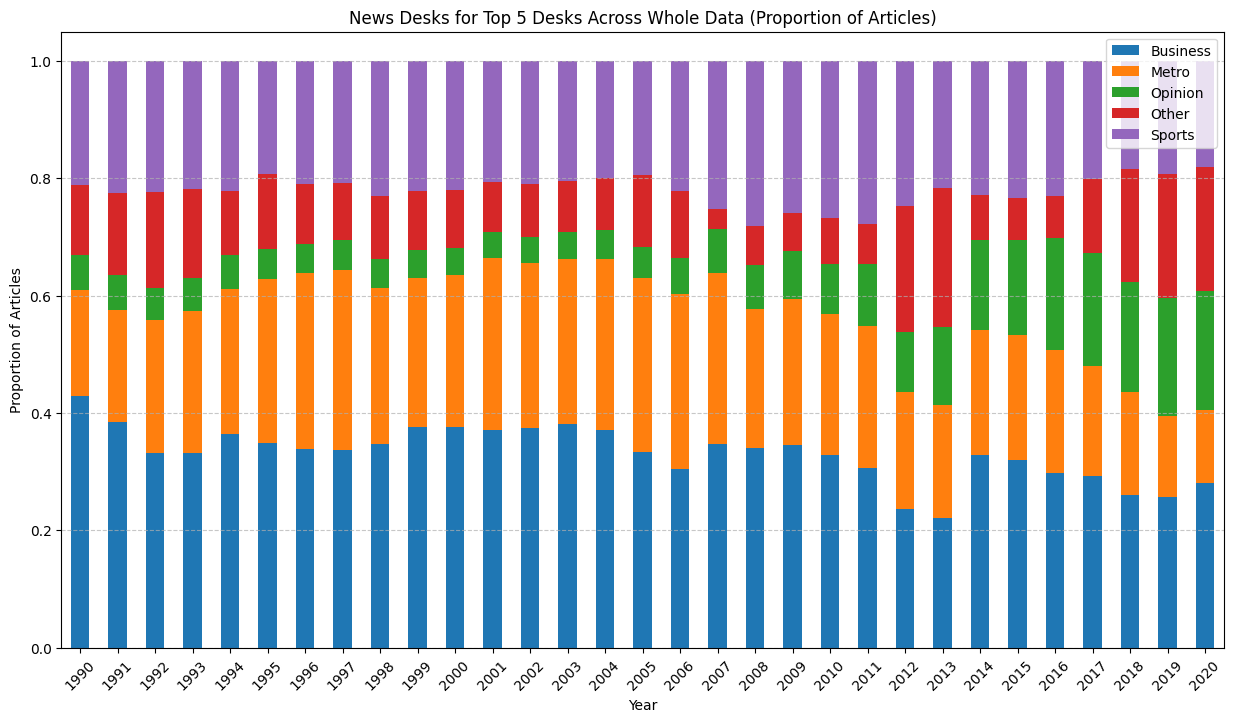

In [ ]:
#Stacked barchart with top 5 news desks across all 5 years
# print(data['news_desk'].value_counts())
grouped = data.groupby(data['year']).value_counts()
grouped = grouped.reset_index()
#filter grouped by the top 5 news desks


top_5_desks = grouped[grouped['news_desk'].isin(data['news_desk'].value_counts().head(5).index)]

#remove decimal from the year
top_5_desks['year'] = top_5_desks['year'].astype(int)

df_pivot = top_5_desks.pivot_table(
    index=top_5_desks['year'],
    columns=top_5_desks['news_desk'],
    aggfunc='size')

df_prop = df_pivot.div(df_pivot.sum(axis=1), axis=0)

df_prop.plot(kind='bar', stacked=True, figsize =(15,8),color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'],width=0.5)
plt.title("News Desks for Top 5 Desks Across Whole Data (Proportion of Articles)")
plt.xlabel("Year")
plt.ylabel("Proportion of Articles")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc = 'upper right')
plt.show()





##EDA for Dataframe 2: article data between 1990 to 2020


In [ ]:
empty_title = df2[df2['title'] == '']
data2 = df2.drop(empty_title.index)

In [ ]:
#Find word count for each title
data2['headline_word_count'] = data2['title'].apply(lambda x: len(str(x).split()))
data2.head(1)

year  \
0  1920   

                                                                                                                                                               title  \
0  At last the Federal Reserve Board has issued rules for the organization of corporations to transact foreign trade under the Edge bill.   FOREIGN TRADE PROSPECTS.   

  excerpt  headline_word_count  
0                           25

In [ ]:
#data summary
print(data2.shape)
print(data2.dtypes)
print(data2['headline_word_count'].describe().astype(int))

#article with the longest headline word count
pd.set_option('display.max_colwidth', None)
max_word_count = data2.loc[data2['headline_word_count'] == data2['headline_word_count'].max()]
print(max_word_count['title'])




(17370652, 4)
year                    int64
title                  object
excerpt                object
headline_word_count     int64
dtype: object
count    17370652
mean           27
std            55
min             1
25%             7
50%            16
75%            35
max         22148
Name: headline_word_count, dtype: int64
14940678    (cont. from page F9)    9857 Shea, M, 30F . . . . . . . . . . . . .4:09:07  9858 Daly, H, 37F . . . . . . . . . . . . .4:09:07  9859 Burger, R, 48M . . . . . . . . . . .4:09:08  9860 Jeche, J, 32M . . . . . . . . . . . .4:09:08  9861 Poelman, M, 43M . . . . . . . . .4:09:08  9862 Gaspare, S, 53M . . . . . . . . .4:09:08  9863 Petrelli, V, 34F . . . . . . . . . . . .4:09:08  9864 Ketchum, D, 39M . . . . . . . . .4:09:08  9865 Rehm, G, 40M . . . . . . . . . . . .4:09:08  9866 Ostrander, E, 33F . . . . . . . . .4:09:09  9867 Sowerby, H, 25F . . . . . . . . . .4:09:09  9868 Alley, E, 35M . . . . . . . . . . . . .4:09:10  9869 Carter, W, 30M . . . . . .

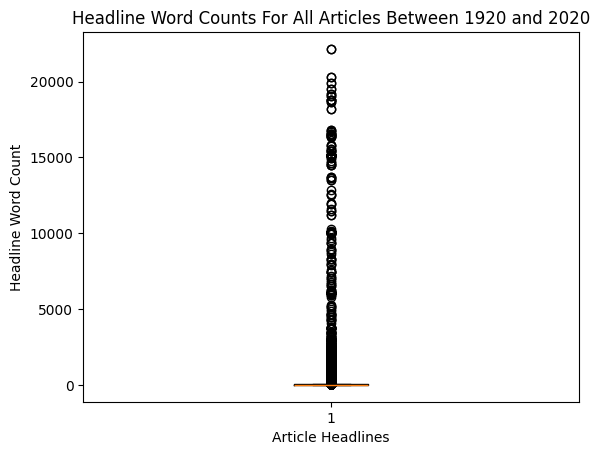

In [ ]:
plt.boxplot(data2['headline_word_count'])
plt.xlabel('Article Headlines')
plt.ylabel('Headline Word Count')
plt.title('Headline Word Counts For All Articles Between 1920 and 2020')
plt.show()

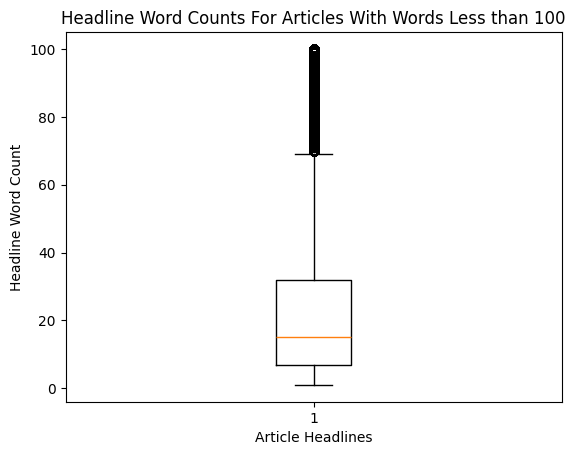

In [ ]:
#create new dataframe with article headlines with 100 words or fewer
data2_short = data2[data2['headline_word_count'] <= 100]

plt.boxplot(data2_short['headline_word_count'])
plt.xlabel('Article Headlines')
plt.ylabel('Headline Word Count')
plt.title('Headline Word Counts For Articles With Words Less than 100')
plt.show()

#Model Training and Analysis

## ChatGPT Model


First, using the OpenAI API key, we developed a mechanism to successfully query ChatGPT for 1) a numerical sentiment rating between -1 and 1, and 2) a classification sentiment rating of either positive, negative, and neutral. We made the prompt as specific as possible to avoid having to perform additional cleaning for the output of the query.

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, \
                        GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
                            roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#describe the sentiment classifications
current_df_retry = pd.read_csv('current_df_retry.csv')
print(current_df_retry['sentiment classification'].value_counts(),'\n')
print("Numerical Ratngs \n",current_df_retry['numerical rating'].describe())


FileNotFoundError: [Errno 2] No such file or directory: 'current_df_retry.csv'

###Naive Models

Just from the sentiment classifications alone, we experimented with two models to test the performance of certain features and their ability to predict sentiment. We used the following two features:

1. Article word count: using the `word_count` feature, we used a logistic regression model to predict sentiment classifications.

2. One-hot-encoded key words: From the dataset of sentiment-classified headlines, we tokenized each headline into words, filtering for the most frequently seen words. Extracting the number of positive, negative, and neutral occurences of these words, we created arrays for the most commonly seen positive and negative words, which we one-hot-encoded into a dataset that would predict sentiment classifications on a logistic regression model.

In [ ]:
#develop a naive model that just measures word count of the headlines
current_df_retry = pd.read_csv('current_df_retry.csv')
X = current_df_retry[['word_count']].values
y = current_df_retry['sentiment classification'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

trial_model = LogisticRegressionCV(Cs=10,
                                    penalty='l2',
                                    cv=5,
                                    solver='saga',
                                    max_iter=1000,
                                    random_state=109)
trial_model.fit(X_train, y_train)
y_pred_test = trial_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_test)}')

print(f'Classification report: \n\n{classification_report(y_test, y_pred_test)}')

Accuracy: 0.7
Classification report: 

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        50
     neutral       0.70      1.00      0.82       140
    positive       0.00      0.00      0.00        10

    accuracy                           0.70       200
   macro avg       0.23      0.33      0.27       200
weighted avg       0.49      0.70      0.58       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


sentiment classification  negative  neutral  positive  total count
headline                                                          
paid                         0.875    0.125     0.000           40
with                         0.237    0.684     0.079           38
deaths                       1.000    0.000     0.000           35
from                         0.154    0.808     0.038           26
corrections                  0.062    0.938     0.000           16
briefing                     0.312    0.688     0.000           16
world                        0.267    0.733     0.000           15
york                         0.400    0.600     0.000           15
reports                      0.071    0.929     0.000           14
that                         0.071    0.857     0.071           14
earnings                     0.071    0.857     0.071           14
says                         0.286    0.714     0.000           14
your                         0.214    0.786     0.000           14
after                        0.417    0.500     0.083           12
more                         0.333    0.583     0.083           12
about                        0.182    0.818     0.000           11
will                         0.273    0.636     0.091           11
dies                         1.000    0.000     0.000           10
deal                         0.100    0.900     0.000           10
house                        0.400    0.600     0.000           10
music                        0.000    0.778     0.222            9
still                        0.444    0.444     0.111            9
over                         0.444    0.444     0.111            9
company                      0.111    0.778     0.111            9
into                         0.333    0.556     0.111            9
officer                      0.889    0.111     0.000            9
business                     0.111    0.889     0.000            9
life                         0.000    1.000     0.000            9
first                        0.111    0.778     0.111            9
time                         0.125    0.750     0.125            8
case                         0.250    0.750     0.000            8
plan                         0.250    0.750     0.000            8
what                         0.375    0.625     0.000            8
city                         0.250    0.750     0.000            8
this                         0.125    0.875     0.000            8
china                        0.286    0.714     0.000            7
clinton                      0.286    0.714     0.000            7
just                         0.286    0.714     0.000            7
news                         0.286    0.714     0.000            7
million                      0.429    0.571     0.000            7
have                         0.286    0.714     0.000            7
years                        0.000    1.000     0.000            7
gets                         0.000    0.667     0.333            6
american                     0.000    1.000     0.000            6
money                        0.667    0.333     0.000            6
bill                         0.167    0.833     0.000            6
sept                         0.000    1.000     0.000            6
year                         0.167    0.833     0.000            6
police                       1.000    0.000     0.000            6
finds                        0.333    0.667     0.000            6

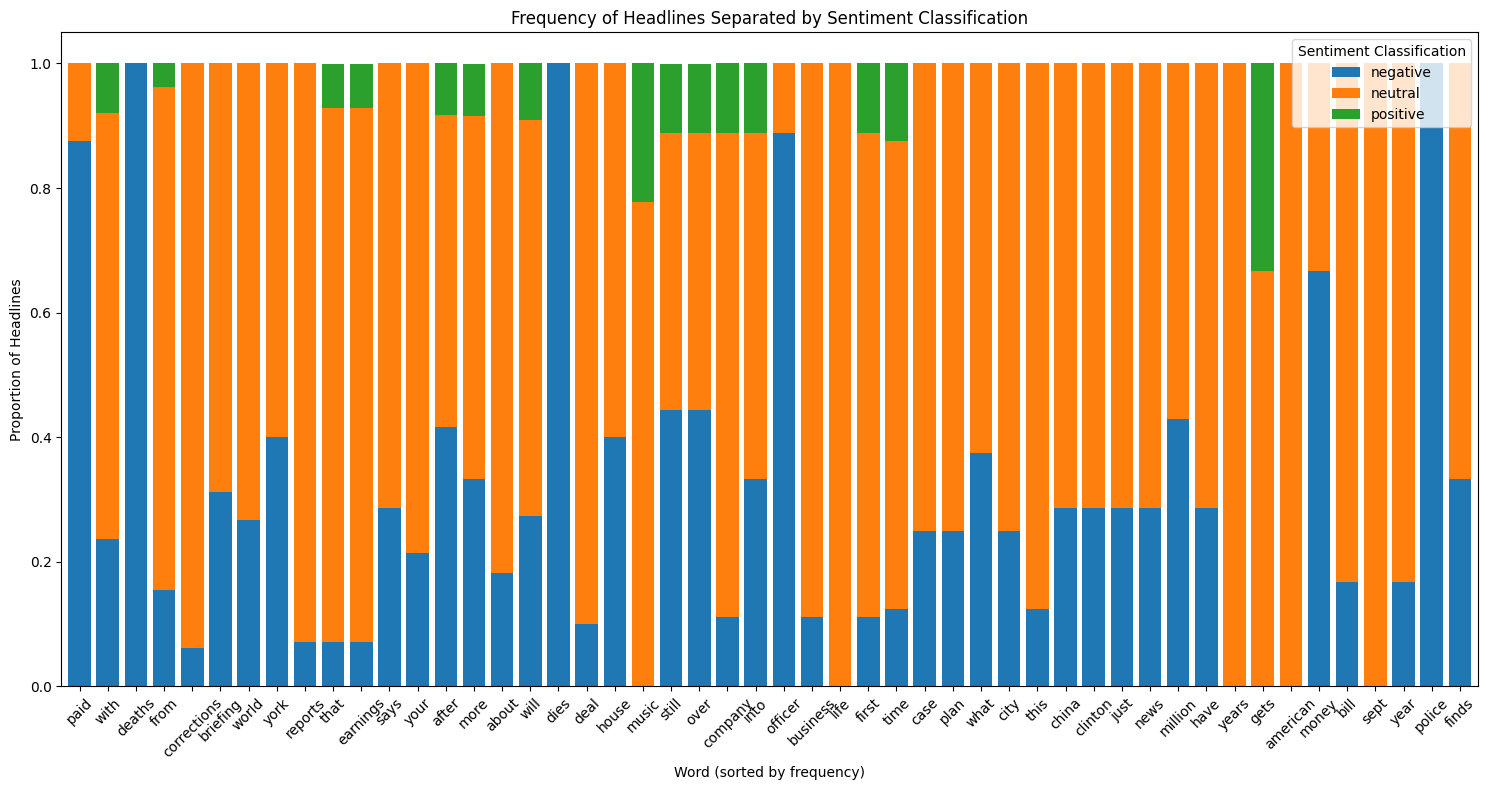

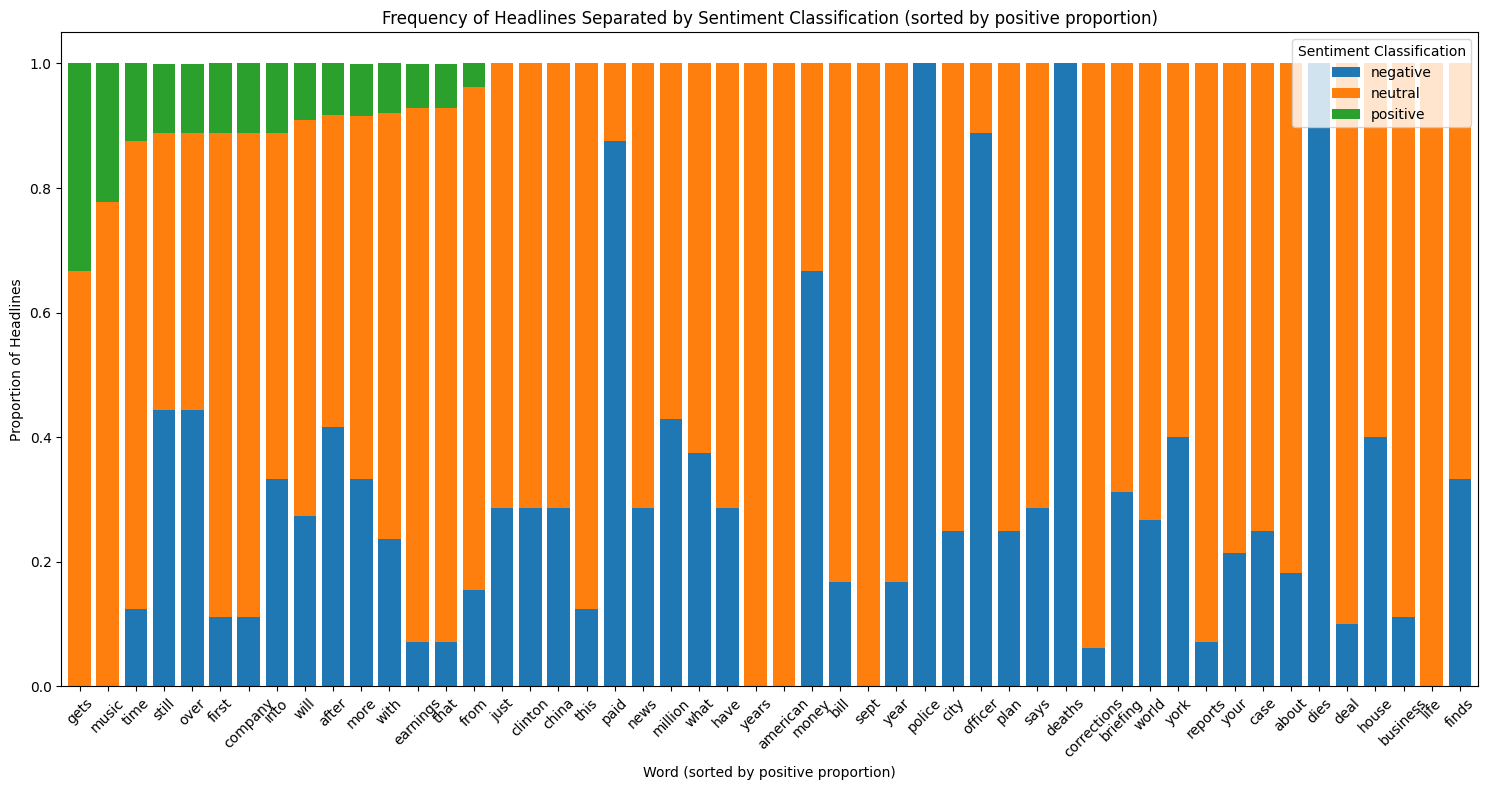

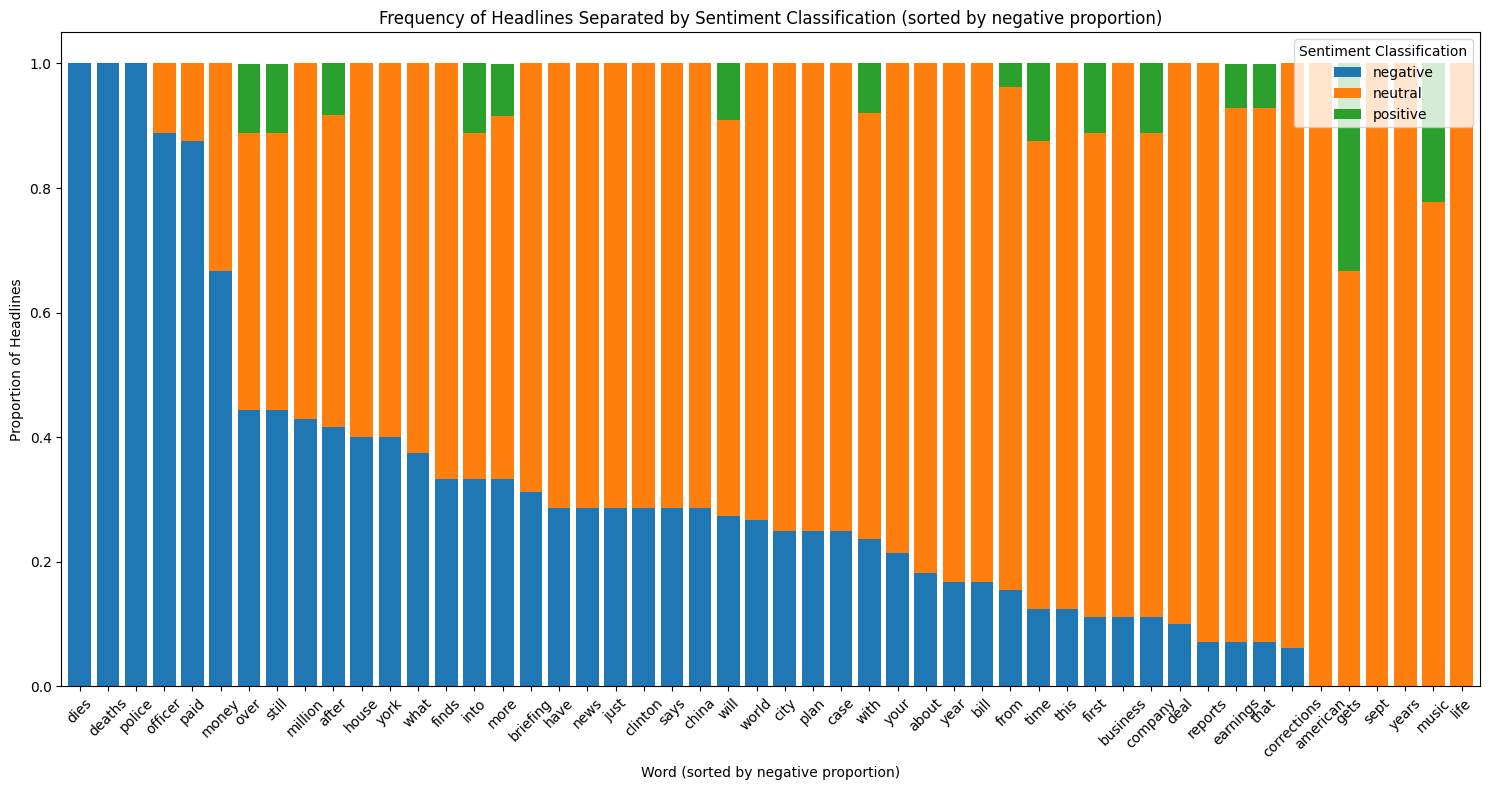

In [ ]:
#feature engineering by charting the frequency of each word and the proportion of words classified positive, negative, and neutral
#tokenize the headlines, lowering the case and removing punctuation
current_df_retry = pd.read_csv('current_df_retry.csv')

tokenized = current_df_retry['headline'].astype(str).apply(lambda x: x.lower().split())
tokenized = tokenized.apply(lambda x: [word for word in x if word.isalpha()])

#only include words with lengths greater than 3
tokenized = tokenized.apply(lambda x: [word for word in x if len(word)>3])
current_df_retry['headline'] = tokenized

#make each word as a row in the dataframe
exploded = current_df_retry.explode('headline')

#find count of negative, positive, and neutral for each word
grouped = exploded.groupby(['headline','sentiment classification']).size().unstack(fill_value=0)
grouped['total count'] = grouped['negative'] + grouped['positive'] + grouped['neutral']
grouped.sort_values(by='total count', ascending=False, inplace=True)

#find proportion of each classification
grouped['negative'] = grouped['negative']/grouped['total count']
grouped['positive'] = grouped['positive']/grouped['total count']
grouped['neutral'] = grouped['neutral']/grouped['total count']
grouped = grouped[grouped.columns].round(3)
top50 = grouped[grouped.columns[0:3]].head(50)

#create stacked bar chart
top50.plot(kind='bar',stacked=True,figsize=(15,8),width=0.8, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Frequency of Headlines Separated by Sentiment Classification')
plt.xlabel('Word (sorted by frequency)')
plt.ylabel('Proportion of Headlines')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Classification',loc='upper right')
plt.tight_layout()


#graph when grouping by highest proportion of positive word
positive_grouped = top50.sort_values(by='positive', ascending=False).head(50)

positive_grouped.plot(kind='bar',stacked=True,figsize=(15,8),width=0.8, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Frequency of Headlines Separated by Sentiment Classification (sorted by positive proportion)')
plt.xlabel('Word (sorted by positive proportion)')
plt.ylabel('Proportion of Headlines')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Classification',loc='upper right')
plt.tight_layout()


#graph when grouping by highest proportion of negative word
negative_grouped = top50.sort_values(by='negative', ascending=False).head(50)
negative_grouped.plot(kind='bar',stacked=True,figsize=(15,8),width=0.8, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Frequency of Headlines Separated by Sentiment Classification (sorted by negative proportion)')
plt.xlabel('Word (sorted by negative proportion)')
plt.ylabel('Proportion of Headlines')
plt.xticks(rotation=45)
plt.legend(title='Sentiment Classification',loc='upper right')
plt.tight_layout()



In [ ]:
#curate list of negative and positive words
negative_words_list = list(negative_grouped.head(10).index)
positive_words_list = list(positive_grouped.head(10).index)
print(negative_words_list)
print(positive_words_list)

#one hot encode the original dataframe that contains words in the negative word list
current_df_retry['contains negative word'] = current_df_retry['headline'].apply(lambda x: 1 if any(word in x for word in negative_words_list) else 0)
current_df_retry['contains positive word'] = current_df_retry['headline'].apply(lambda x: 1 if any(word in x for word in positive_words_list) else 0)
current_df_retry


encoded = current_df_retry[['contains negative word','contains positive word','sentiment classification']]


['dies', 'deaths', 'police', 'officer', 'paid', 'money', 'over', 'still', 'million', 'after']
['gets', 'music', 'time', 'still', 'over', 'first', 'company', 'into', 'will', 'after']


In [ ]:
#train logistic regression model based on encoded dataset
X = encoded[['contains negative word','contains positive word']]
y = encoded['sentiment classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

base_model = LogisticRegressionCV(Cs=10,
                                    penalty='l2',
                                    cv=5,
                                    solver='saga',
                                    max_iter=1000,
                                    random_state=109)
base_model.fit(X_train, y_train)
y_pred_test = base_model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred_test)}')

print(f'Classification report: \n\n{classification_report(y_test, y_pred_test)}')

Accuracy: 0.74
Classification report: 

              precision    recall  f1-score   support

    negative       0.63      0.34      0.44        50
     neutral       0.76      0.94      0.84       140
    positive       0.00      0.00      0.00        10

    accuracy                           0.74       200
   macro avg       0.46      0.43      0.43       200
weighted avg       0.69      0.74      0.70       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Iterative Training Strategy

We created a function that would iteratively expand the training set by adding tested data to the training set.
We preprocessed article words by one-hot-encoding words that exceeded an absolute sentiment rating of 0.5.
We trained a gradient boosting regression model iteratively, adding 1000 samples to the training data from the test data to cover all 10,000 articles. After generating the ratings from our model, we derived negative/neutral and neutral/positive thresholds through two clustering methods: GMM (Gaussian Mixture Model) and K-Means (as seen below). We then reclassified headlines based on thresholds
GMM and K-Means produced of around 100% and 100% accuracy, respectively.



Iteration 1: Training size = 100, Test size = 100, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 2: Training size = 200, Test size = 100, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 3: Training size = 300, Test size = 100, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 4: Training size = 400, Test size = 100, Train MSE = 0.0000, Test MSE = 0.0002
Iteration 5: Training size = 500, Test size = 100, Train MSE = 0.0000, Test MSE = 0.0005
Iteration 6: Training size = 600, Test size = 100, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 7: Training size = 700, Test size = 100, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 8: Training size = 800, Test size = 100, Train MSE = 0.0000, Test MSE = 0.0001
Iteration 9: Training size = 900, Test size = 100, Train MSE = 0.0000, Test MSE = 0.0000


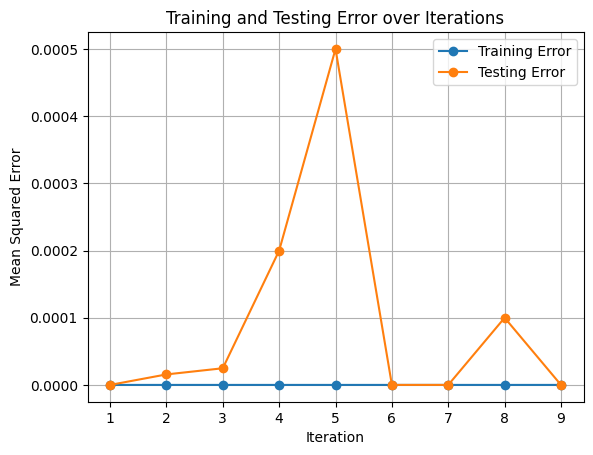

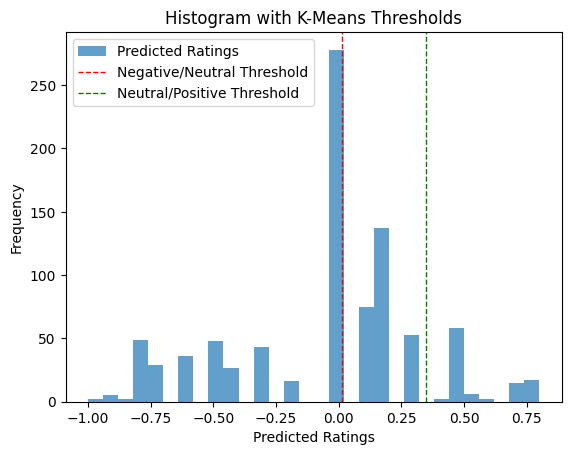

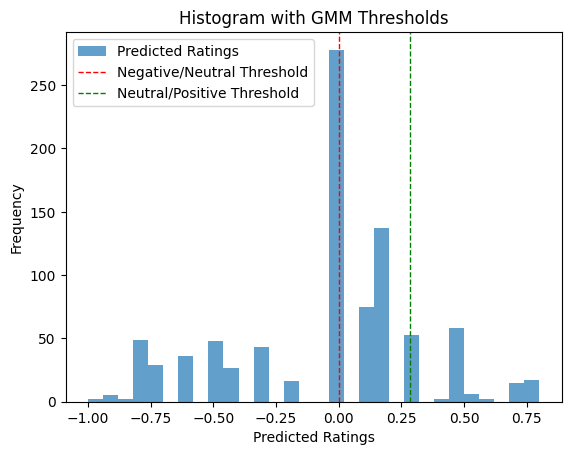

Evaluation metrics using GMM thresholds: {'accuracy': 0.8266666666666667, 'f1': 0.8351848889559597, 'roc_auc': 0.9136111714844599, 'classification_report': '              precision    recall  f1-score   support\n\n    negative       1.00      0.71      0.83       535\n     neutral       0.58      1.00      0.73       212\n    positive       1.00      1.00      1.00       153\n\n    accuracy                           0.83       900\n   macro avg       0.86      0.90      0.85       900\nweighted avg       0.90      0.83      0.84       900\n'}
Evaluation metrics using K-Means thresholds: {'accuracy': 0.9977777777777778, 'f1': 0.9977709854318765, 'roc_auc': 0.9962087399062188, 'classification_report': '              precision    recall  f1-score   support\n\n    negative       1.00      1.00      1.00       535\n     neutral       0.99      1.00      1.00       263\n    positive       1.00      0.98      0.99       102\n\n    accuracy                           1.00       900\n   macro av

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_headlines(df, rating_threshold=0.5):
    """
    Process the headlines column to assign ratings to individual words
    and one-hot encode words with absolute ratings > threshold.

    Args:
        df (pd.DataFrame): DataFrame containing 'headline' and 'rating' columns.
        rating_threshold (float): Threshold for one-hot encoding words.

    Returns:
        pd.DataFrame: Processed DataFrame with one-hot encoded words.
        dict: Dictionary of words and their ratings.
    """
    # Calculate word ratings
    word_ratings = {}
    word_counts = {}

    for _, row in df.iterrows():
        words = row['headline'].lower().split()
        rating = row['numerical rating']
        for word in words:
            if word not in word_ratings:
                word_ratings[word] = 0
                word_counts[word] = 0
            word_ratings[word] += rating
            word_counts[word] += 1

    # Average the ratings for each word
    for word in word_ratings:
        word_ratings[word] /= word_counts[word]

    # Filter words by absolute rating threshold
    filtered_word_ratings = {word: score for word, score in word_ratings.items() if abs(score) > rating_threshold}

    # One-hot encode words with absolute ratings > threshold
    vectorizer = CountVectorizer(vocabulary=list(filtered_word_ratings.keys()))
    word_features = vectorizer.fit_transform(df['headline']).toarray()

    # Add existing features and the one-hot encoded words
    feature_df = pd.DataFrame(word_features, columns=vectorizer.get_feature_names_out())
    feature_df['word_count'] = df['word_count']
    feature_df['numerical rating'] = df['numerical rating']
    feature_df['target'] = df['numerical rating']  # Assuming 'rating' is the target column

    return feature_df, filtered_word_ratings

def iterative_training_and_testing(filepath, n_iterations=9, sample_size=100, rating_threshold=0.5):
    """
    Train a gradient boosting regression model iteratively, starting with an initial training size of 100 and a test size of 100.
    After each iteration, the test data is added to the training data, and new test data is sampled until the final iteration.

    Args:
        filepath (str): Path to the CSV file containing the dataset.
        n_iterations (int): Number of iterations to run.
        sample_size (int): Size of the sample to use for training and testing in each iteration.
        rating_threshold (float): Threshold for one-hot encoding words.

    Returns:
        results (list): A list of dictionaries containing training size, test size, training error, and testing error for each iteration.
        dict: Dictionary of words and their ratings.
        np.ndarray: Predicted ratings for the test set.
        np.ndarray: True labels for the test set.
    """
    results = []

    # Load the dataset
    df = pd.read_csv(filepath)

    # Preprocess the dataset
    processed_df, word_ratings = preprocess_headlines(df, rating_threshold)

    # Shuffle the dataset
    processed_df = processed_df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Split features and target
    X = processed_df.drop(columns=['target']).values
    y = processed_df['target'].values

    if len(X) < (n_iterations + 1) * sample_size:
        raise ValueError("Dataset does not have enough samples for the specified number of iterations.")

    # Initialize training and test data
    X_train, y_train = X[:sample_size], y[:sample_size]
    X_test, y_test = X[sample_size:2 * sample_size], y[sample_size:2 * sample_size]

    # Initialize gradient boosting regression model
    model = GradientBoostingRegressor()

    predictions = []
    true_labels = []

    for i in range(n_iterations):
        # Train the model
        model.fit(X_train, y_train)

        # Calculate training error
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)

        # Test the model
        y_test_pred = model.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)

        predictions.extend(y_test_pred)
        true_labels.extend(y_test)

        # Store results
        results.append({
            'iteration': i + 1,
            'training_size': len(X_train),
            'test_size': len(X_test),
            'train_mse': train_mse,
            'test_mse': test_mse
        })

        print(f"Iteration {i + 1}: Training size = {len(X_train)}, Test size = {len(X_test)}, Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")

        # Add test data to training set
        X_train = np.vstack((X_train, X_test))
        y_train = np.hstack((y_train, y_test))

        # Update test set
        start_idx = (i + 2) * sample_size
        end_idx = start_idx + sample_size
        X_test, y_test = X[start_idx:end_idx], y[start_idx:end_idx]

    return results, word_ratings, np.array(predictions), np.array(true_labels)

def determine_thresholds_with_clustering(predictions, method='kmeans'):
    """
    Determine thresholds for sentiment classification using clustering algorithms.

    Args:
        predictions (np.ndarray): Predicted numerical ratings.
        method (str): Method to use for determining thresholds ('kmeans', 'gmm').

    Returns:
        tuple: Thresholds for negative/neutral and neutral/positive classification.
    """
    if method == 'kmeans':
        # K-Means clustering
        kmeans = KMeans(n_clusters=3, random_state=42)
        clusters = kmeans.fit_predict(predictions.reshape(-1, 1))
        centers = sorted(kmeans.cluster_centers_.flatten())
        return centers[1], centers[2]
    elif method == 'gmm':
        # Gaussian Mixture Model
        gmm = GaussianMixture(n_components=3, random_state=42)
        gmm.fit(predictions.reshape(-1, 1))
        means = sorted(gmm.means_.flatten())
        return means[1], means[2]
    else:
        raise ValueError("Unsupported method. Use 'kmeans' or 'gmm'.")

def classify_and_evaluate(predictions, true_labels, thresholds):
    """
    Classify predicted ratings into sentiments and evaluate classification performance.

    Args:
        predictions (np.ndarray): Predicted numerical ratings.
        true_labels (np.ndarray): True sentiment labels.
        thresholds (tuple): Tuple of (negative_neutral_threshold, neutral_positive_threshold).

    Returns:
        dict: A dictionary containing evaluation metrics.
    """
    neg_neutral, neutral_pos = thresholds

    # Classify predictions
    classified = np.where(predictions < neg_neutral, 'negative',
                  np.where(predictions < neutral_pos, 'neutral', 'positive'))

    # Map true labels to sentiment categories
    true_class = np.where(true_labels < neg_neutral, 'negative',
                 np.where(true_labels < neutral_pos, 'neutral', 'positive'))

    # Calculate metrics
    accuracy = accuracy_score(true_class, classified)
    f1 = f1_score(true_class, classified, average='weighted')
    roc_auc = roc_auc_score(pd.get_dummies(true_class), pd.get_dummies(classified), multi_class='ovr')

    return {
        'accuracy': accuracy,
        'f1': f1,
        'roc_auc': roc_auc,
        'classification_report': classification_report(true_class, classified)
    }

# Run the function and evaluate
filepath = "/content/drive/My Drive/NYT_data/current_df_retry.csv"
results, word_ratings, predictions, true_labels = iterative_training_and_testing(filepath, n_iterations=9, sample_size=100, rating_threshold=0.5)

# Save word ratings to a CSV file
word_ratings_df = pd.DataFrame(list(word_ratings.items()), columns=['Word', 'Rating'])
word_ratings_df.to_csv("word_ratings.csv", index=False)

# Plot training and testing errors over iterations
train_mse_values = [result['train_mse'] for result in results]
test_mse_values = [result['test_mse'] for result in results]
iterations = [result['iteration'] for result in results]

plt.plot(iterations, train_mse_values, marker='o', label='Training Error')
plt.plot(iterations, test_mse_values, marker='o', label='Testing Error')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Error over Iterations')
plt.legend()
plt.grid()
plt.show()

# Determine thresholds with clustering
kmeans_thresholds = determine_thresholds_with_clustering(predictions, method='kmeans')
gmm_thresholds = determine_thresholds_with_clustering(predictions, method='gmm')

# Plot histograms for each method
for thresholds, method in zip([kmeans_thresholds, gmm_thresholds], ['K-Means', 'GMM']):
    plt.hist(predictions, bins=30, alpha=0.7, label='Predicted Ratings')
    plt.axvline(thresholds[0], color='red', linestyle='dashed', linewidth=1, label='Negative/Neutral Threshold')
    plt.axvline(thresholds[1], color='green', linestyle='dashed', linewidth=1, label='Neutral/Positive Threshold')
    plt.xlabel('Predicted Ratings')
    plt.ylabel('Frequency')
    plt.title(f'Histogram with {method} Thresholds')
    plt.legend()
    plt.show()

# Evaluate with the GMM thresholds
evaluation_metrics_gmm = classify_and_evaluate(predictions, true_labels, gmm_thresholds)
print(f"Evaluation metrics using GMM thresholds: {evaluation_metrics_gmm}")

# Evaluate with the K-Means thresholds
evaluation_metrics_kmeans = classify_and_evaluate(predictions, true_labels, kmeans_thresholds)
print(f"Evaluation metrics using K-Means thresholds: {evaluation_metrics_kmeans}")


Iteration 1: Training size = 1000, Test size = 1000, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 2: Training size = 2000, Test size = 1000, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 3: Training size = 3000, Test size = 1000, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 4: Training size = 4000, Test size = 1000, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 5: Training size = 5000, Test size = 1000, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 6: Training size = 6000, Test size = 1000, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 7: Training size = 7000, Test size = 1000, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 8: Training size = 8000, Test size = 1000, Train MSE = 0.0000, Test MSE = 0.0000
Iteration 9: Training size = 9000, Test size = 1000, Train MSE = 0.0000, Test MSE = 0.0000


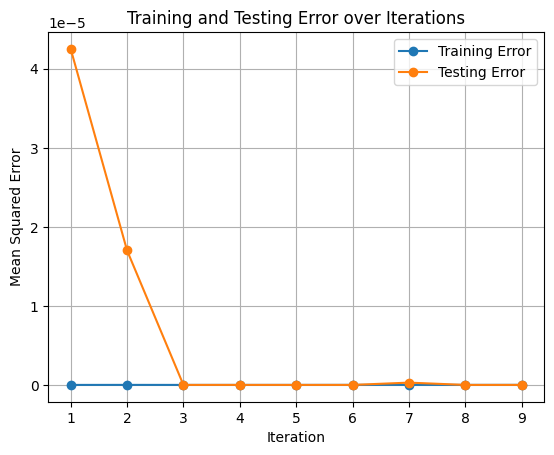

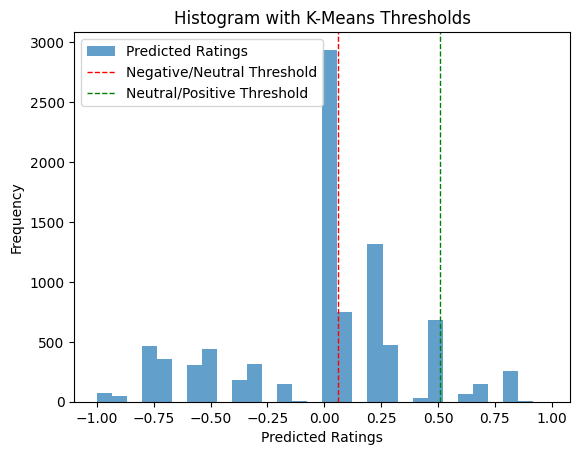

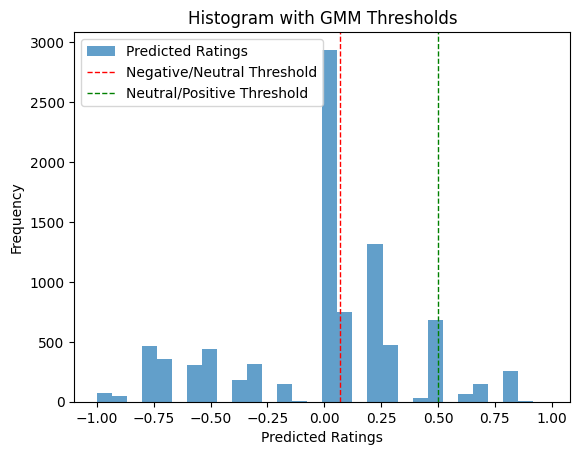

Evaluation metrics using GMM thresholds: {'accuracy': 1.0, 'f1': 1.0, 'roc_auc': 1.0, 'classification_report': '              precision    recall  f1-score   support\n\n    negative       1.00      1.00      1.00      5276\n     neutral       1.00      1.00      1.00      2567\n    positive       1.00      1.00      1.00      1157\n\n    accuracy                           1.00      9000\n   macro avg       1.00      1.00      1.00      9000\nweighted avg       1.00      1.00      1.00      9000\n'}
Evaluation metrics using K-Means thresholds: {'accuracy': 1.0, 'f1': 1.0, 'roc_auc': 1.0, 'classification_report': '              precision    recall  f1-score   support\n\n    negative       1.00      1.00      1.00      5276\n     neutral       1.00      1.00      1.00      3251\n    positive       1.00      1.00      1.00       473\n\n    accuracy                           1.00      9000\n   macro avg       1.00      1.00      1.00      9000\nweighted avg       1.00      1.00      1.00   

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_headlines(df, rating_threshold=0.5):
    """
    Process the headlines column to assign ratings to individual words
    and one-hot encode words with absolute ratings > threshold.

    Args:
        df (pd.DataFrame): DataFrame containing 'headline' and 'rating' columns.
        rating_threshold (float): Threshold for one-hot encoding words.

    Returns:
        pd.DataFrame: Processed DataFrame with one-hot encoded words.
        dict: Dictionary of words and their ratings.
    """
    # Replace NaN headlines with an empty string
    df['headline'] = df['headline'].fillna("")

    # Calculate word ratings
    word_ratings = {}
    word_counts = {}

    for _, row in df.iterrows():
        # Ensure 'headline' is a string
        if not isinstance(row['headline'], str):
            continue  # Skip rows where 'headline' is not a string
        words = row['headline'].lower().split()
        rating = row['numerical rating']
        for word in words:
            if word not in word_ratings:
                word_ratings[word] = 0
                word_counts[word] = 0
            word_ratings[word] += rating
            word_counts[word] += 1

    # Average the ratings for each word
    for word in word_ratings:
        word_ratings[word] /= word_counts[word]

    # Filter words by absolute rating threshold
    filtered_word_ratings = {word: score for word, score in word_ratings.items() if abs(score) > rating_threshold}

    # One-hot encode words with absolute ratings > threshold
    vectorizer = CountVectorizer(vocabulary=list(filtered_word_ratings.keys()))
    word_features = vectorizer.fit_transform(df['headline']).toarray()

    # Add existing features and the one-hot encoded words
    feature_df = pd.DataFrame(word_features, columns=vectorizer.get_feature_names_out())
    feature_df['word_count'] = df['word_count']
    feature_df['numerical rating'] = df['numerical rating']
    feature_df['target'] = df['numerical rating']  # Assuming 'rating' is the target column

    return feature_df, filtered_word_ratings

def iterative_training_and_testing(filepath, n_iterations=9, sample_size=1000, rating_threshold=0.5):
    """
    Train a gradient boosting regression model iteratively, starting with an initial training size of 1000 and a test size of 1000.
    After each iteration, the test data is added to the training data, and new test data is sampled until the final iteration.

    Args:
        filepath (str): Path to the CSV file containing the dataset.
        n_iterations (int): Number of iterations to run.
        sample_size (int): Size of the sample to use for training and testing in each iteration.
        rating_threshold (float): Threshold for one-hot encoding words.

    Returns:
        results (list): A list of dictionaries containing training size, test size, training error, and testing error for each iteration.
        dict: Dictionary of words and their ratings.
        np.ndarray: Predicted ratings for the test set.
        np.ndarray: True labels for the test set.
    """
    results = []

    # Load the dataset
    df = pd.read_csv(filepath)

    # Preprocess the dataset
    processed_df, word_ratings = preprocess_headlines(df, rating_threshold)

    # Shuffle the dataset
    processed_df = processed_df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Split features and target
    X = processed_df.drop(columns=['target']).values
    y = processed_df['target'].values

    if len(X) < (n_iterations + 1) * sample_size:
        raise ValueError("Dataset does not have enough samples for the specified number of iterations.")

    # Initialize training and test data
    X_train, y_train = X[:sample_size], y[:sample_size]
    X_test, y_test = X[sample_size:2 * sample_size], y[sample_size:2 * sample_size]

    # Initialize gradient boosting regression model
    model = GradientBoostingRegressor()

    predictions = []
    true_labels = []

    for i in range(n_iterations):
        # Train the model
        model.fit(X_train, y_train)

        # Calculate training error
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)

        # Test the model
        y_test_pred = model.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)

        predictions.extend(y_test_pred)
        true_labels.extend(y_test)

        # Store results
        results.append({
            'iteration': i + 1,
            'training_size': len(X_train),
            'test_size': len(X_test),
            'train_mse': train_mse,
            'test_mse': test_mse
        })

        print(f"Iteration {i + 1}: Training size = {len(X_train)}, Test size = {len(X_test)}, Train MSE = {train_mse:.4f}, Test MSE = {test_mse:.4f}")

        # Add test data to training set
        X_train = np.vstack((X_train, X_test))
        y_train = np.hstack((y_train, y_test))

        # Update test set
        start_idx = (i + 2) * sample_size
        end_idx = start_idx + sample_size
        X_test, y_test = X[start_idx:end_idx], y[start_idx:end_idx]

    return results, word_ratings, np.array(predictions), np.array(true_labels)

def determine_thresholds_with_clustering(predictions, method='kmeans'):
    """
    Determine thresholds for sentiment classification using clustering algorithms.

    Args:
        predictions (np.ndarray): Predicted numerical ratings.
        method (str): Method to use for determining thresholds ('kmeans', 'gmm').

    Returns:
        tuple: Thresholds for negative/neutral and neutral/positive classification.
    """
    if method == 'kmeans':
        # K-Means clustering
        kmeans = KMeans(n_clusters=3, random_state=42)
        clusters = kmeans.fit_predict(predictions.reshape(-1, 1))
        centers = sorted(kmeans.cluster_centers_.flatten())
        return centers[1], centers[2]
    elif method == 'gmm':
        # Gaussian Mixture Model
        gmm = GaussianMixture(n_components=3, random_state=42)
        gmm.fit(predictions.reshape(-1, 1))
        means = sorted(gmm.means_.flatten())
        return means[1], means[2]
    else:
        raise ValueError("Unsupported method. Use 'kmeans' or 'gmm'.")

def classify_and_evaluate(predictions, true_labels, thresholds):
    """
    Classify predicted ratings into sentiments and evaluate classification performance.

    Args:
        predictions (np.ndarray): Predicted numerical ratings.
        true_labels (np.ndarray): True sentiment labels.
        thresholds (tuple): Tuple of (negative_neutral_threshold, neutral_positive_threshold).

    Returns:
        dict: A dictionary containing evaluation metrics.
    """
    neg_neutral, neutral_pos = thresholds

    # Classify predictions
    classified = np.where(predictions < neg_neutral, 'negative',
                  np.where(predictions < neutral_pos, 'neutral', 'positive'))

    # Map true labels to sentiment categories
    true_class = np.where(true_labels < neg_neutral, 'negative',
                 np.where(true_labels < neutral_pos, 'neutral', 'positive'))

    # Calculate metrics
    accuracy = accuracy_score(true_class, classified)
    f1 = f1_score(true_class, classified, average='weighted')
    roc_auc = roc_auc_score(pd.get_dummies(true_class), pd.get_dummies(classified), multi_class='ovr')

    return {
        'accuracy': accuracy,
        'f1': f1,
        'roc_auc': roc_auc,
        'classification_report': classification_report(true_class, classified)
    }

# Run the function and evaluate
filepath = "/content/drive/My Drive/NYT_data/current_df_retry_final.csv"
results, word_ratings, predictions, true_labels = iterative_training_and_testing(filepath, n_iterations=9, sample_size=1000, rating_threshold=0.5)

# Save word ratings to a CSV file
word_ratings_df = pd.DataFrame(list(word_ratings.items()), columns=['Word', 'Rating'])
word_ratings_df.to_csv("word_ratings.csv", index=False)

# Plot training and testing errors over iterations
train_mse_values = [result['train_mse'] for result in results]
test_mse_values = [result['test_mse'] for result in results]
iterations = [result['iteration'] for result in results]

plt.plot(iterations, train_mse_values, marker='o', label='Training Error')
plt.plot(iterations, test_mse_values, marker='o', label='Testing Error')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Error over Iterations')
plt.legend()
plt.grid()
plt.show()

# Determine thresholds with clustering
kmeans_thresholds = determine_thresholds_with_clustering(predictions, method='kmeans')
gmm_thresholds = determine_thresholds_with_clustering(predictions, method='gmm')

# Plot histograms for each method
for thresholds, method in zip([kmeans_thresholds, gmm_thresholds], ['K-Means', 'GMM']):
    plt.hist(predictions, bins=30, alpha=0.7, label='Predicted Ratings')
    plt.axvline(thresholds[0], color='red', linestyle='dashed', linewidth=1, label='Negative/Neutral Threshold')
    plt.axvline(thresholds[1], color='green', linestyle='dashed', linewidth=1, label='Neutral/Positive Threshold')
    plt.xlabel('Predicted Ratings')
    plt.ylabel('Frequency')
    plt.title(f'Histogram with {method} Thresholds')
    plt.legend()
    plt.show()

# Evaluate with the GMM thresholds
evaluation_metrics_gmm = classify_and_evaluate(predictions, true_labels, gmm_thresholds)
print(f"Evaluation metrics using GMM thresholds: {evaluation_metrics_gmm}")

# Evaluate with the K-Means thresholds
evaluation_metrics_kmeans = classify_and_evaluate(predictions, true_labels, kmeans_thresholds)
print(f"Evaluation metrics using K-Means thresholds: {evaluation_metrics_kmeans}")


<ipython-input-9-5d3a2a35585f>:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  current_df_retry_final['month'] = current_df_retry_final['pub_date'].dt.to_period('M')


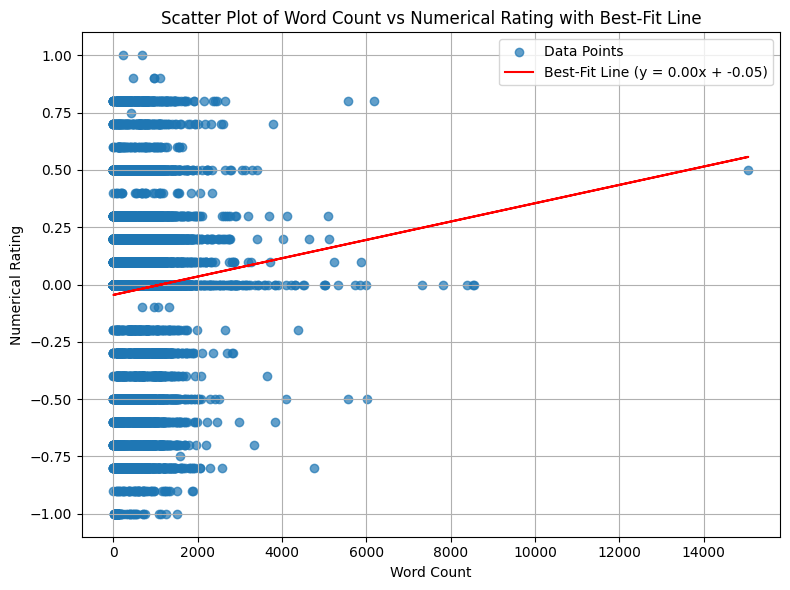

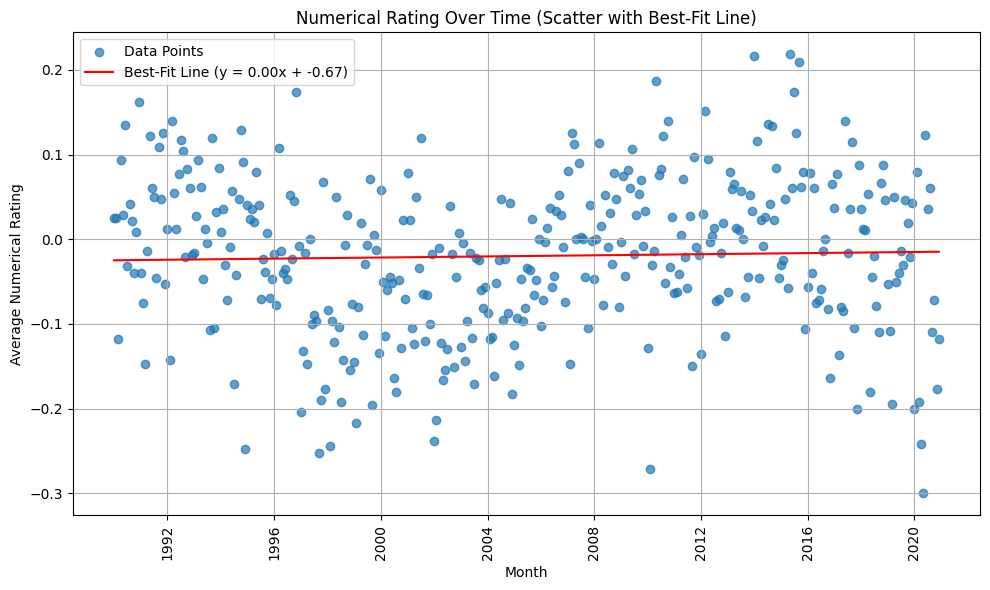

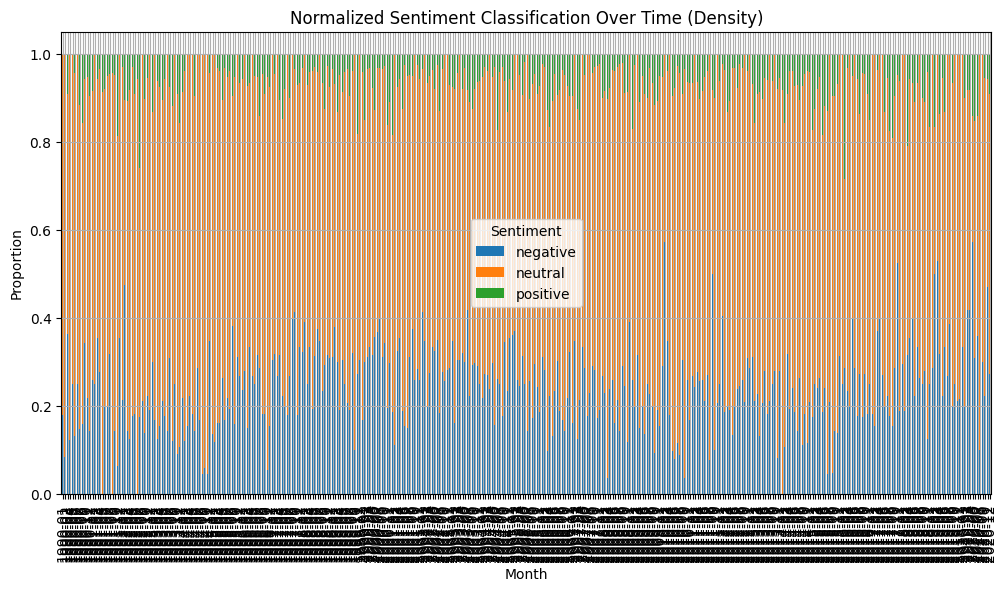

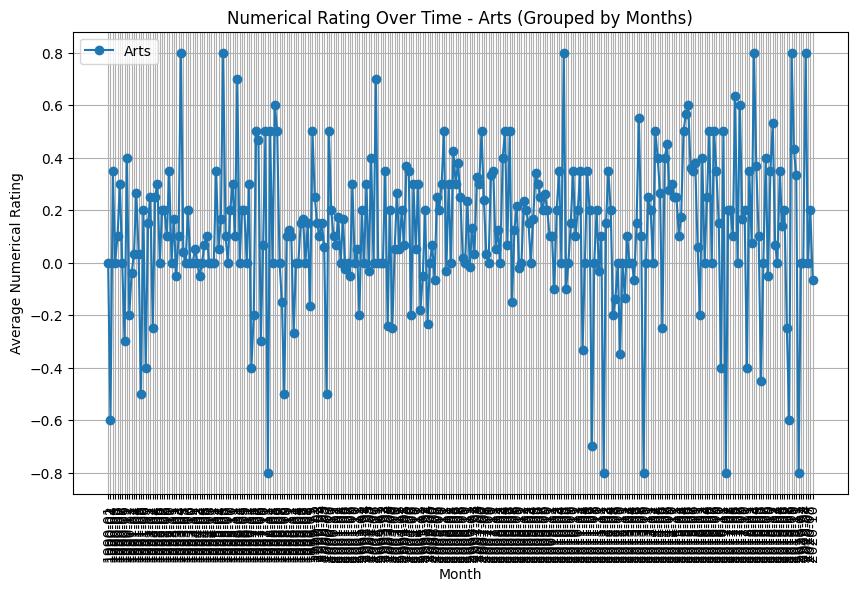

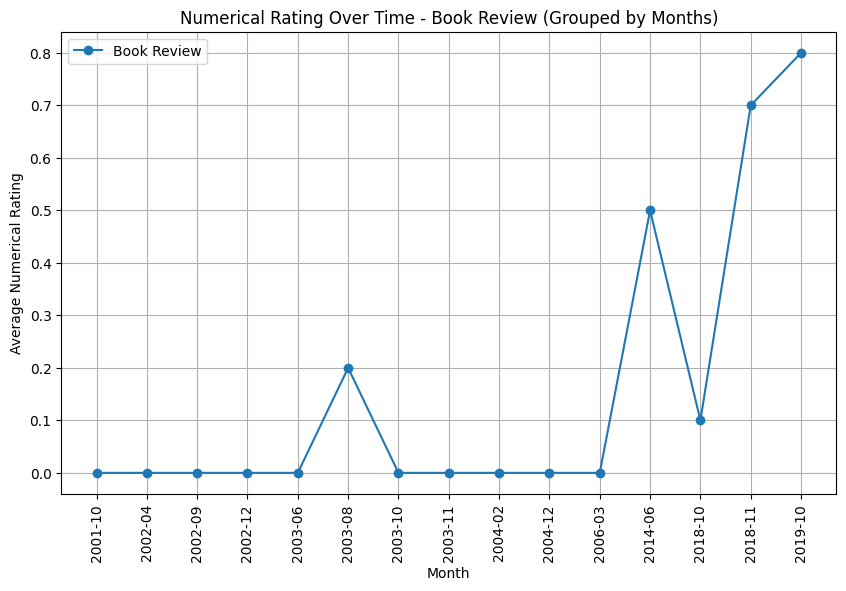

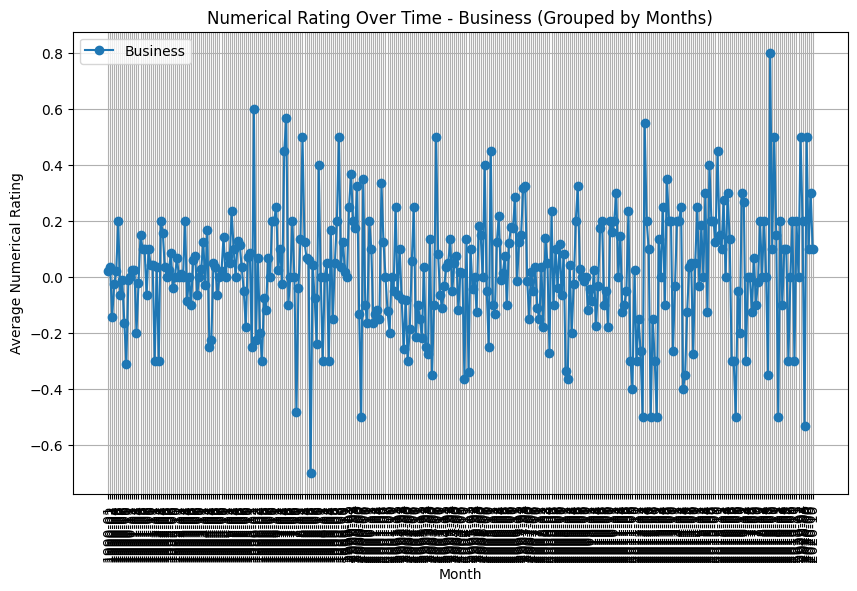

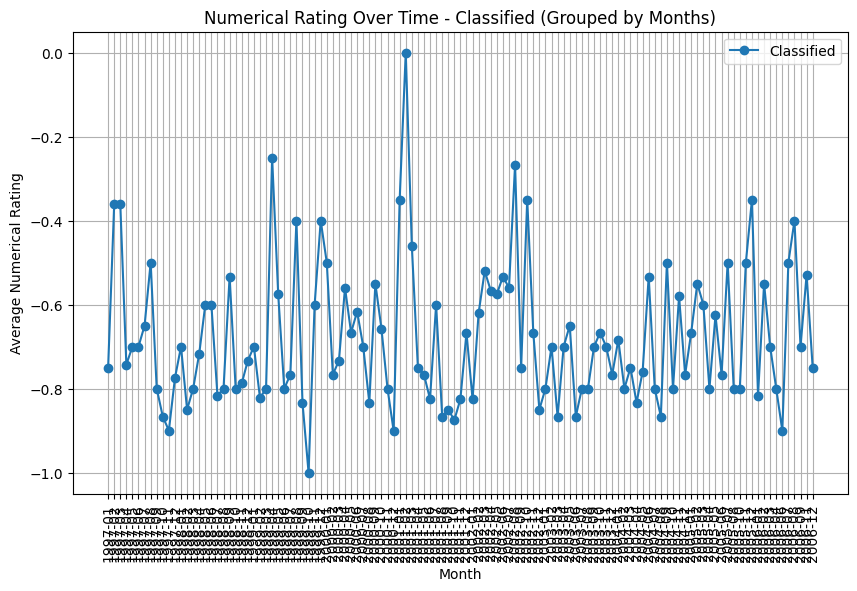

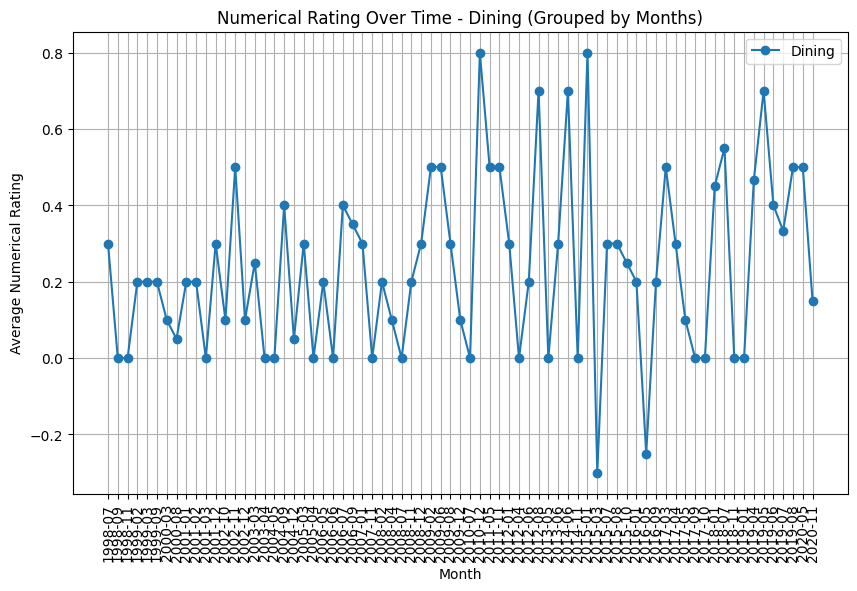

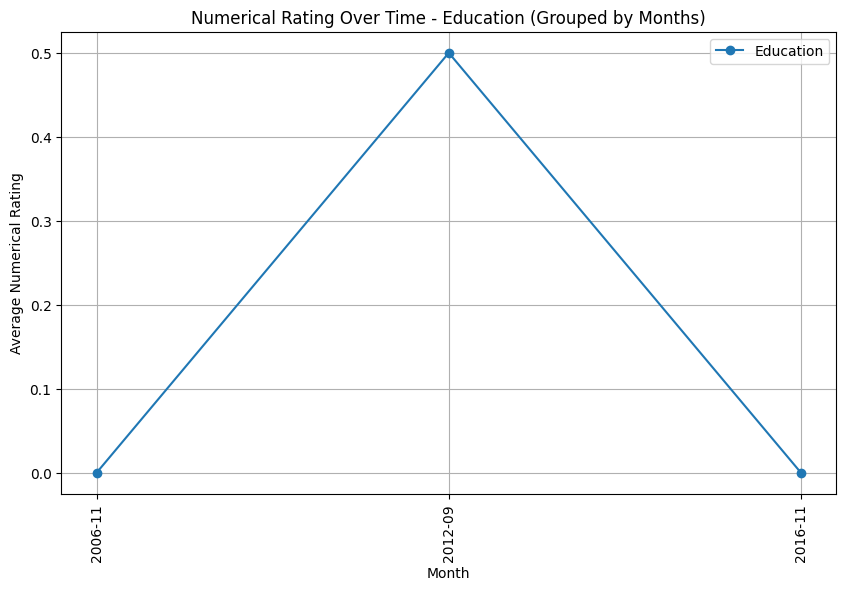

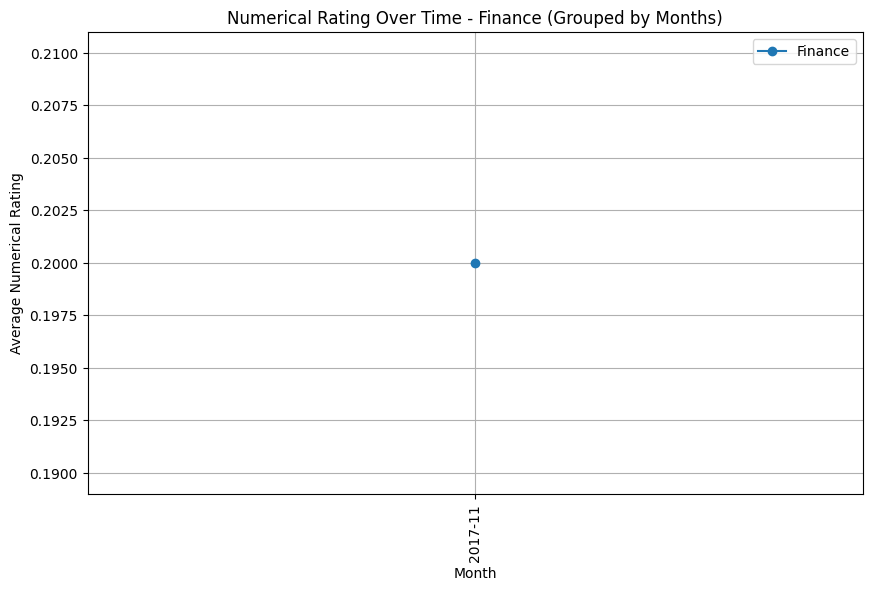

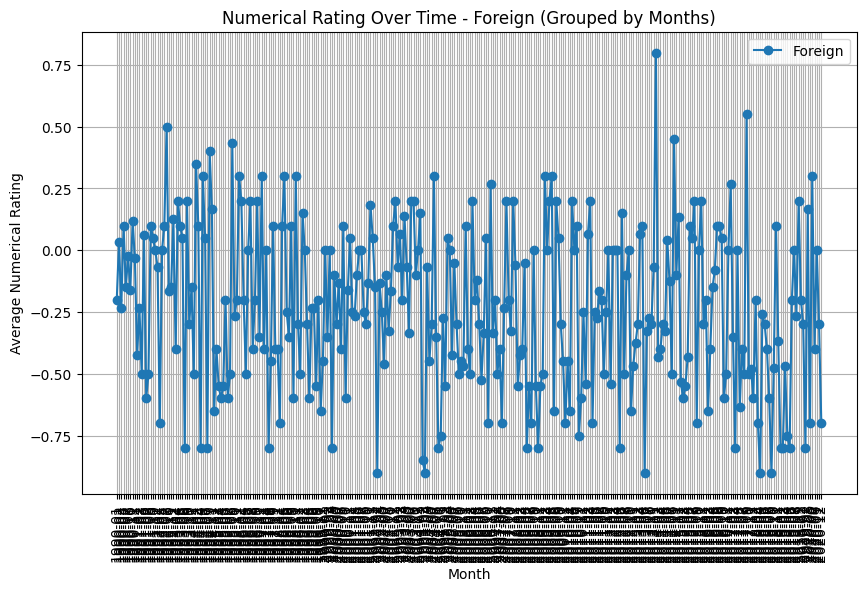

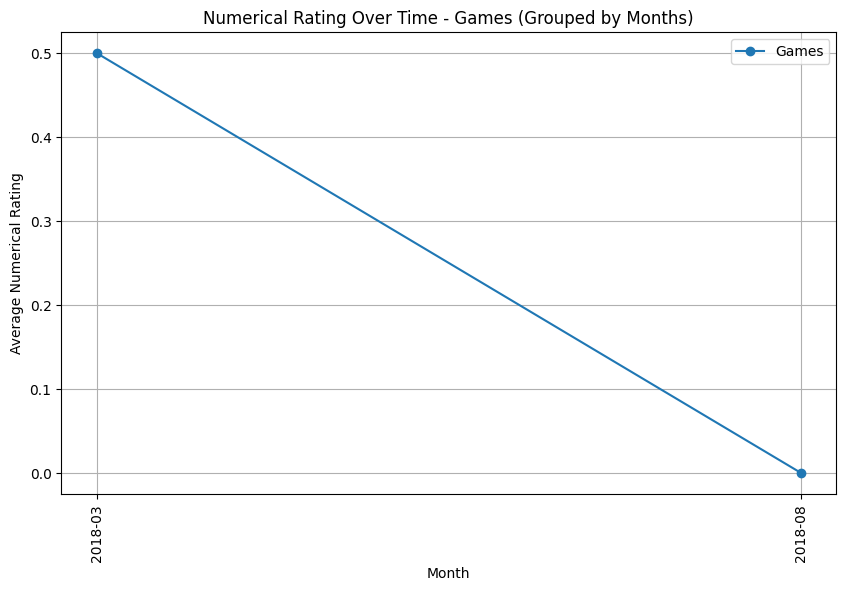

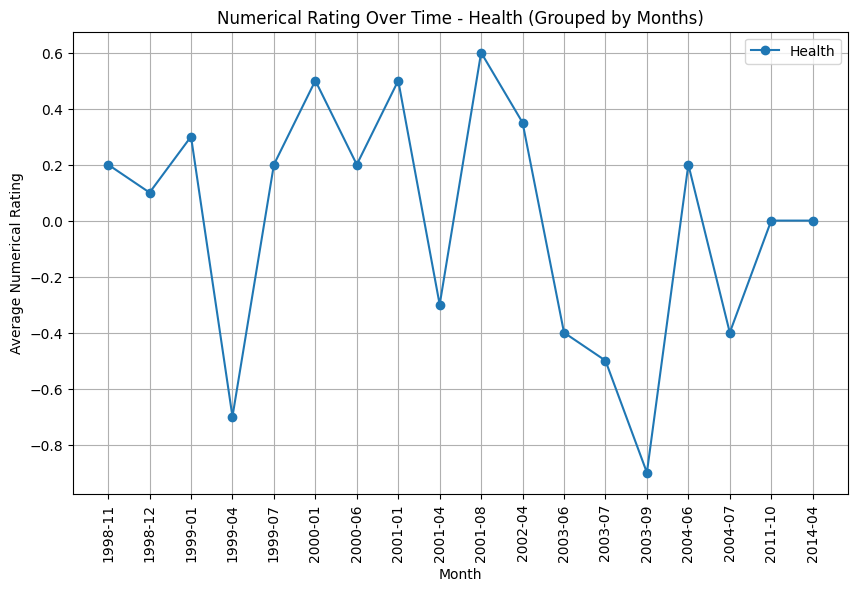

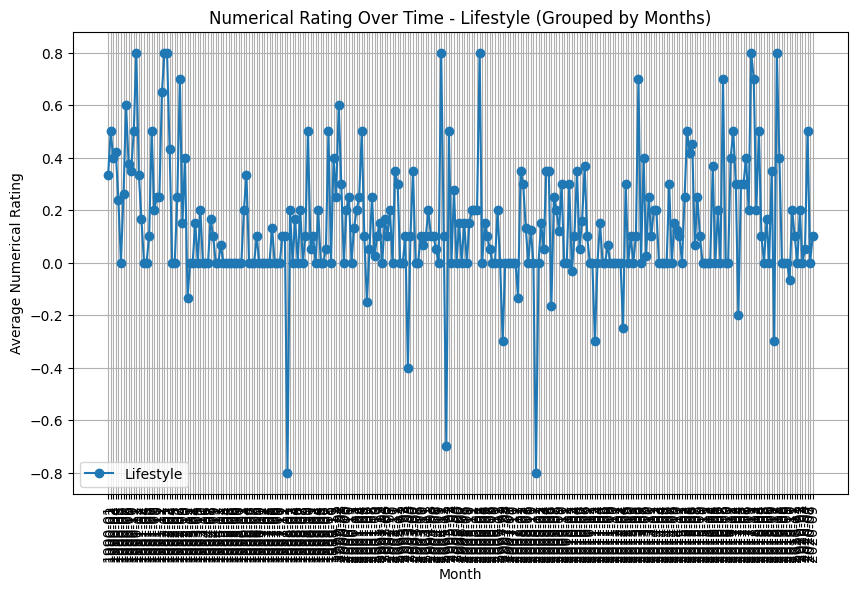

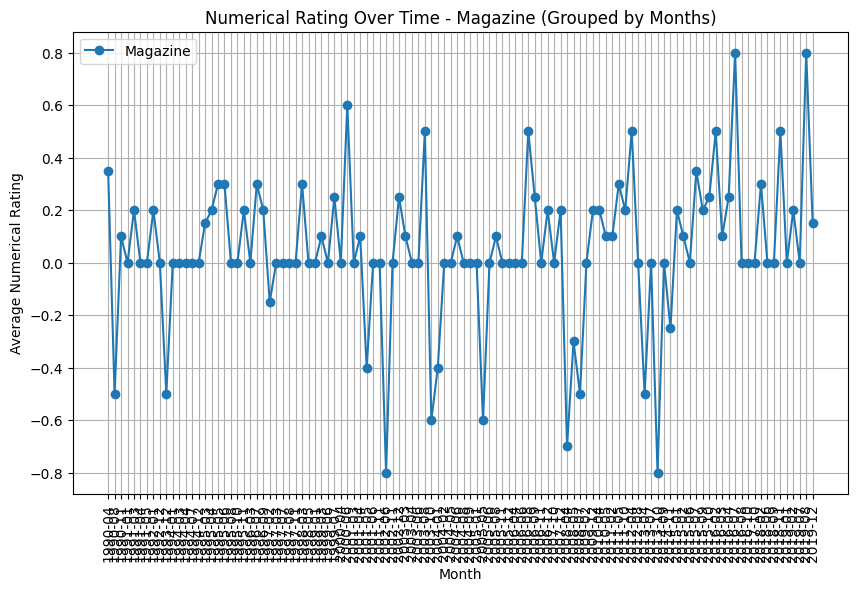

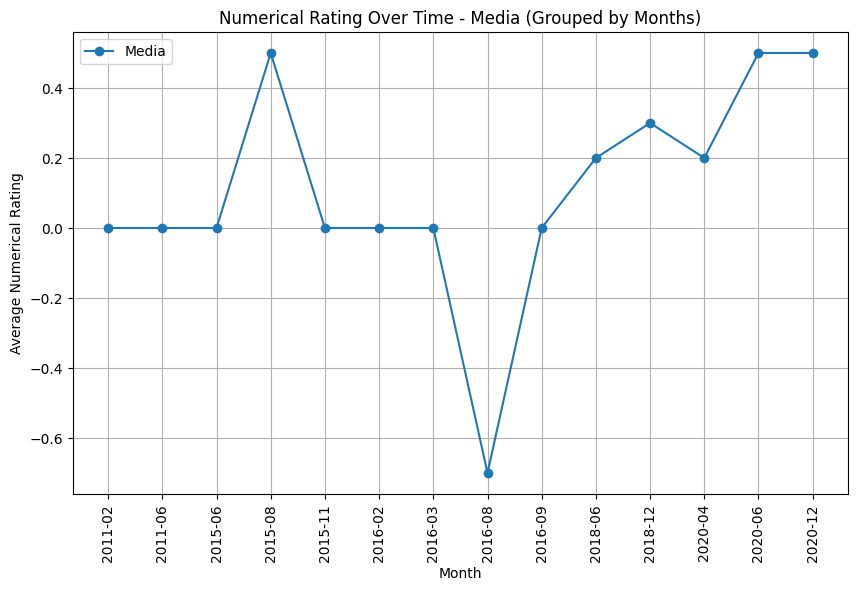

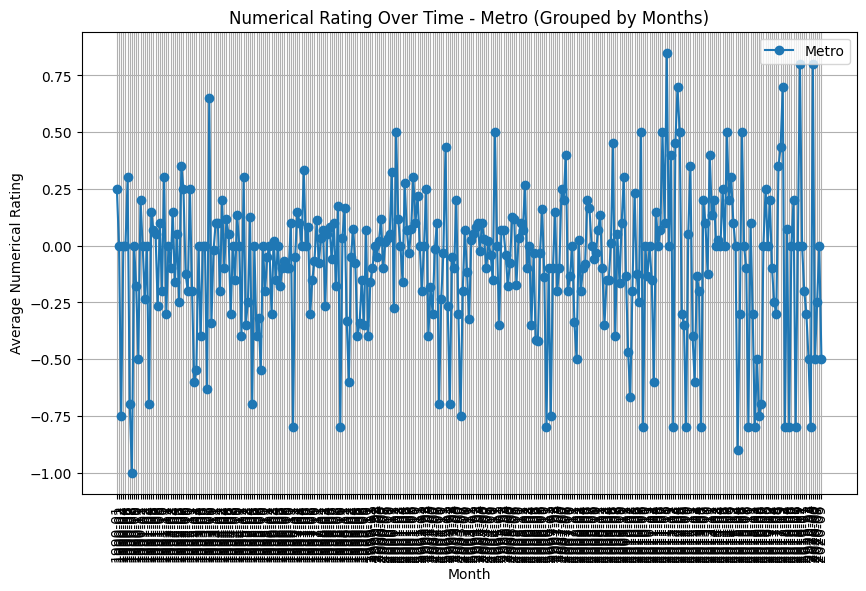

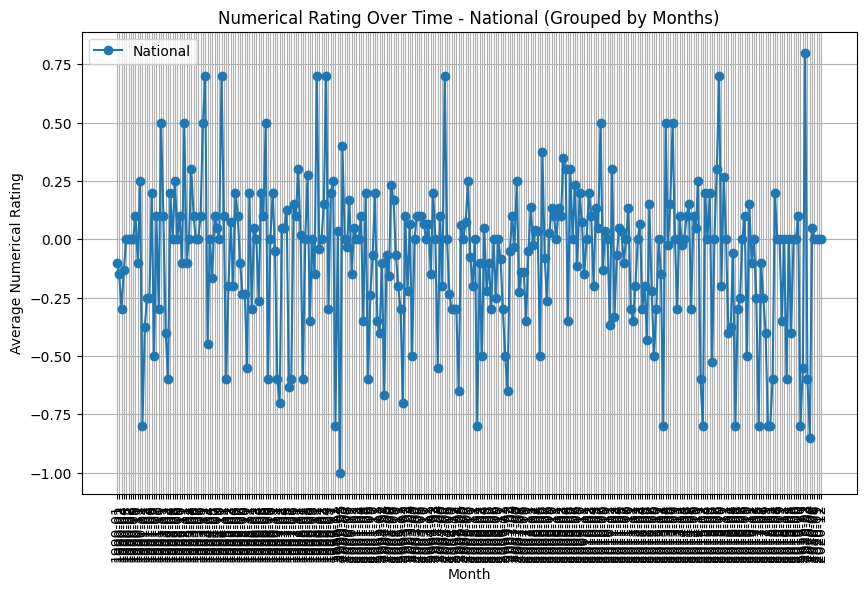

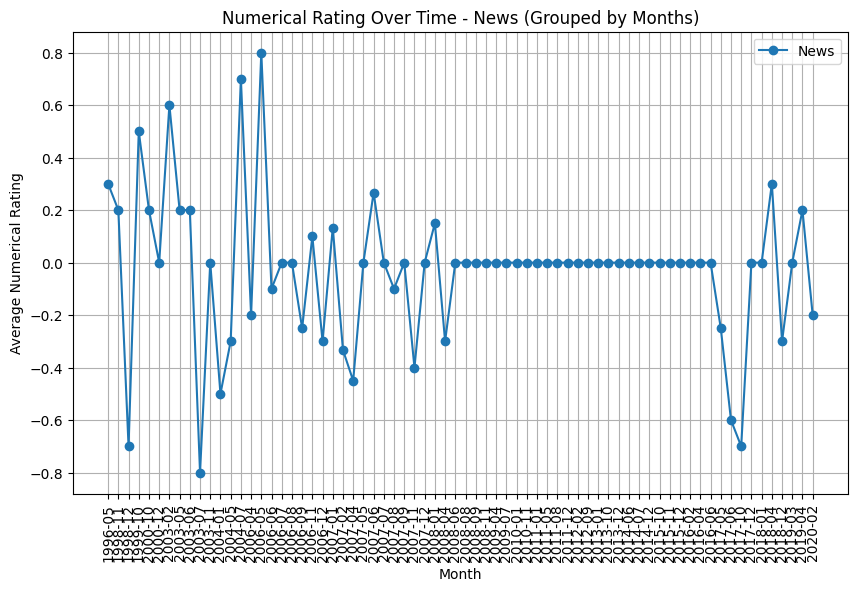

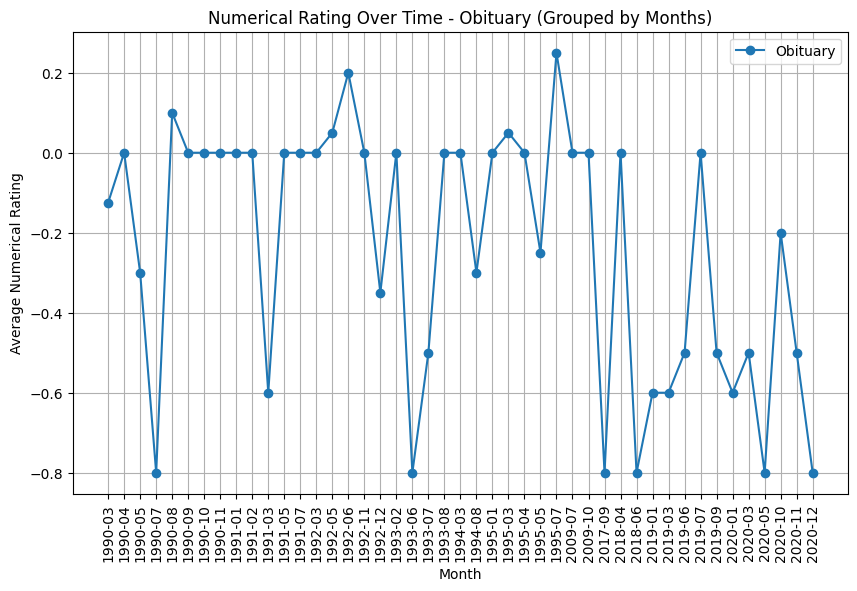

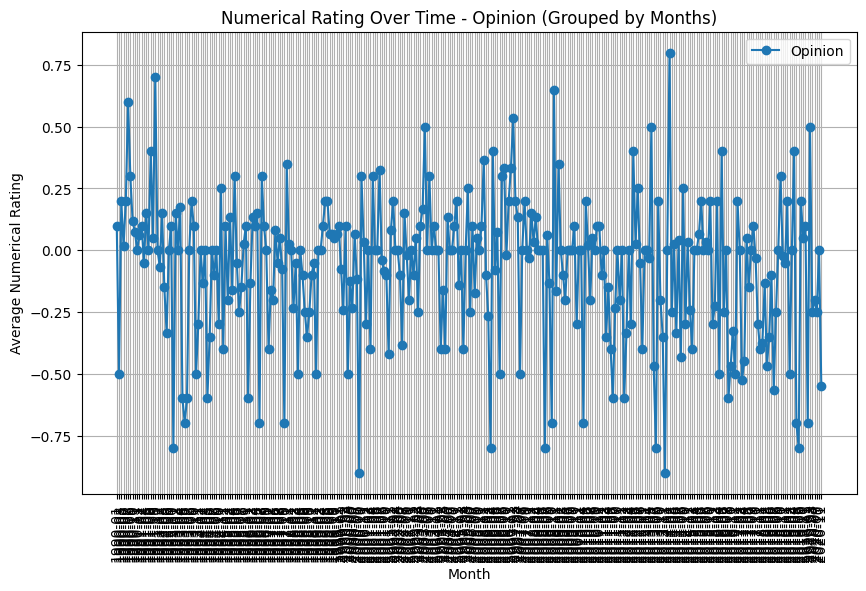

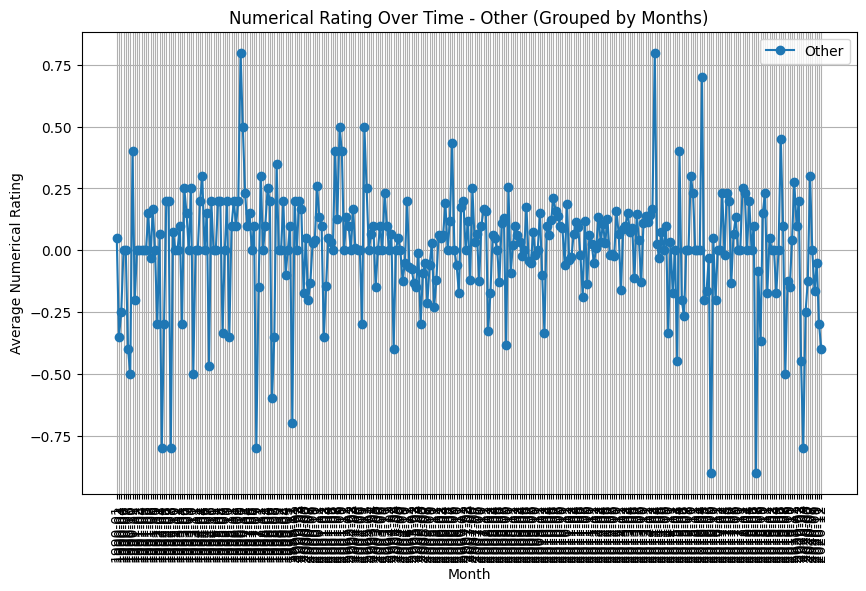

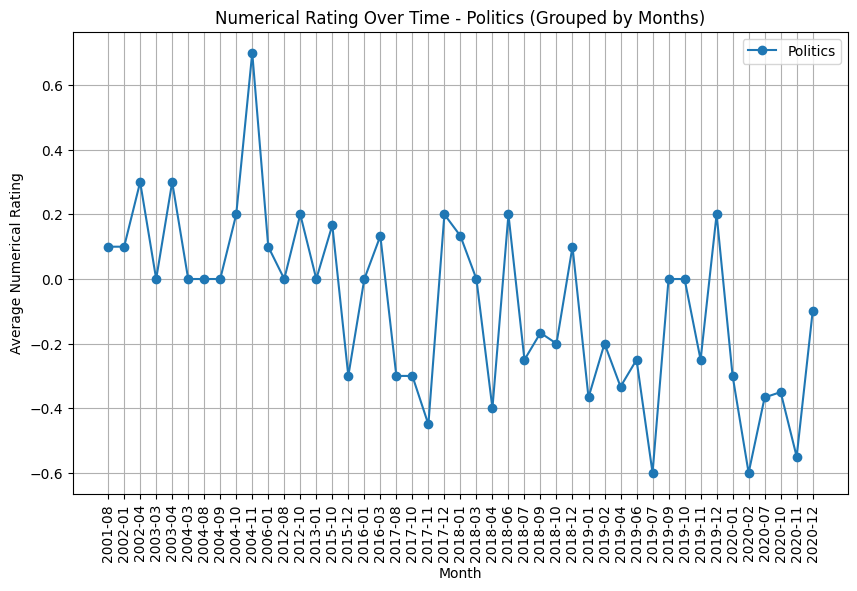

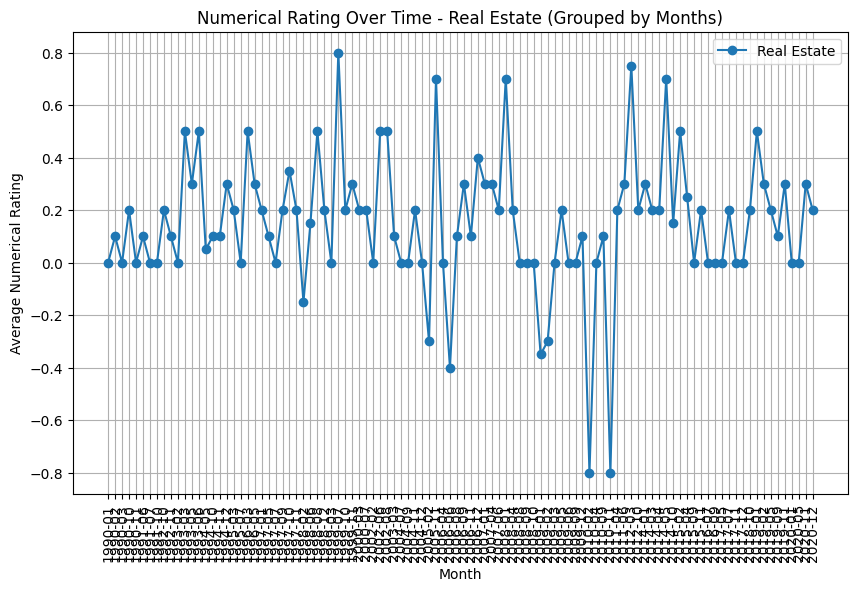

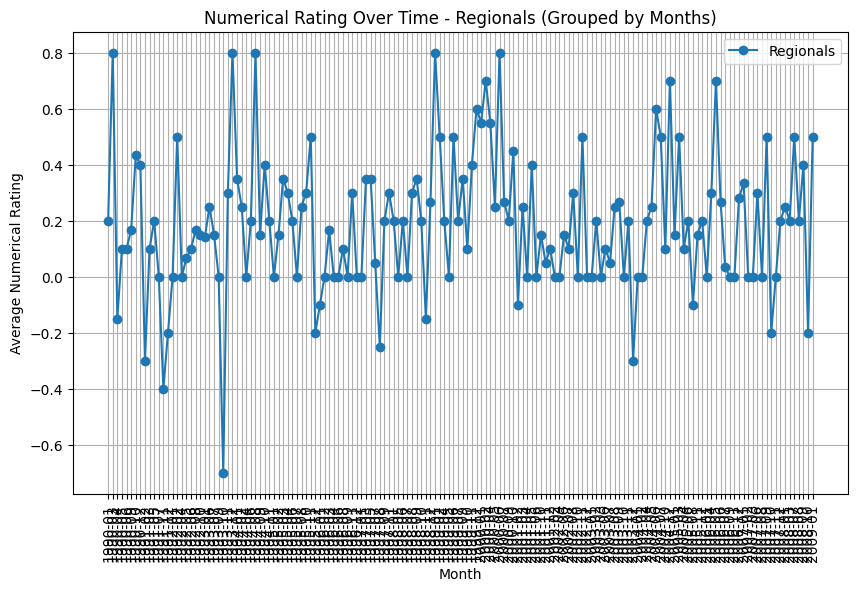

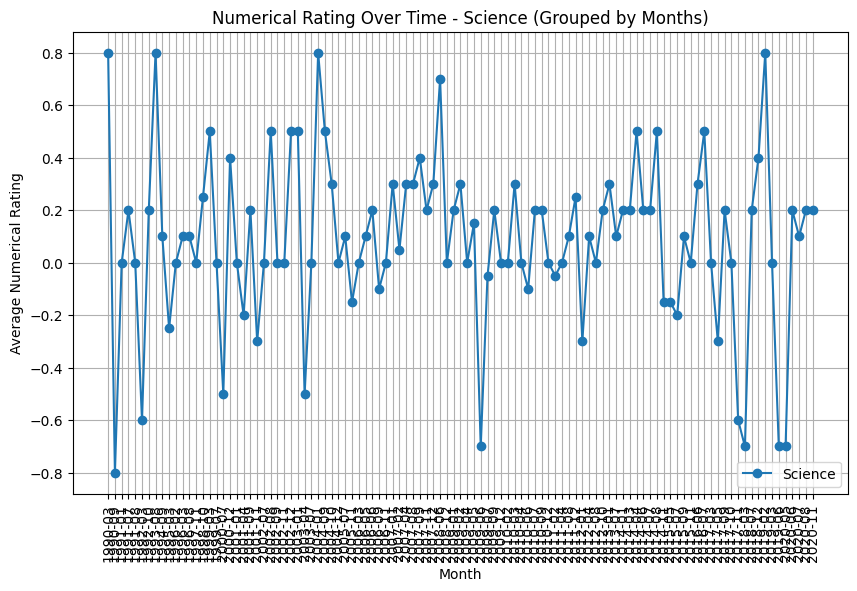

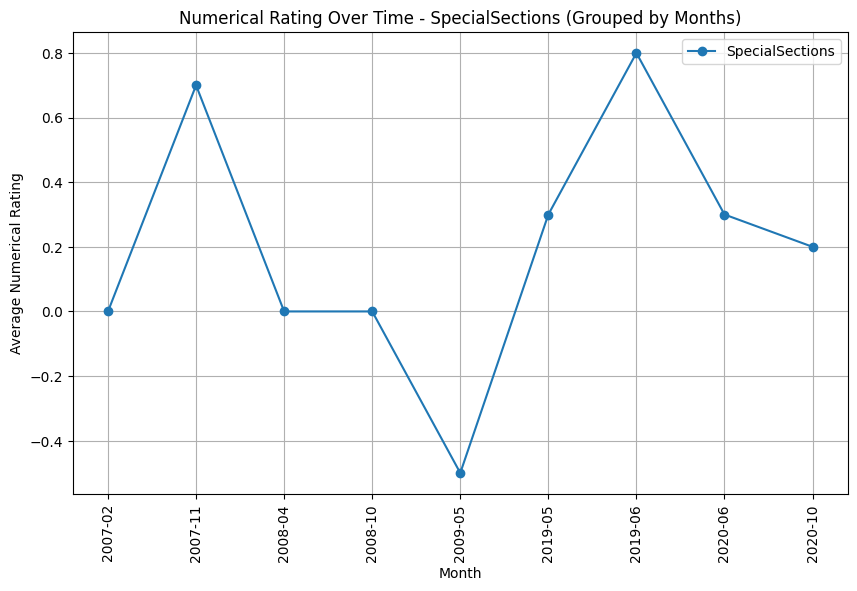

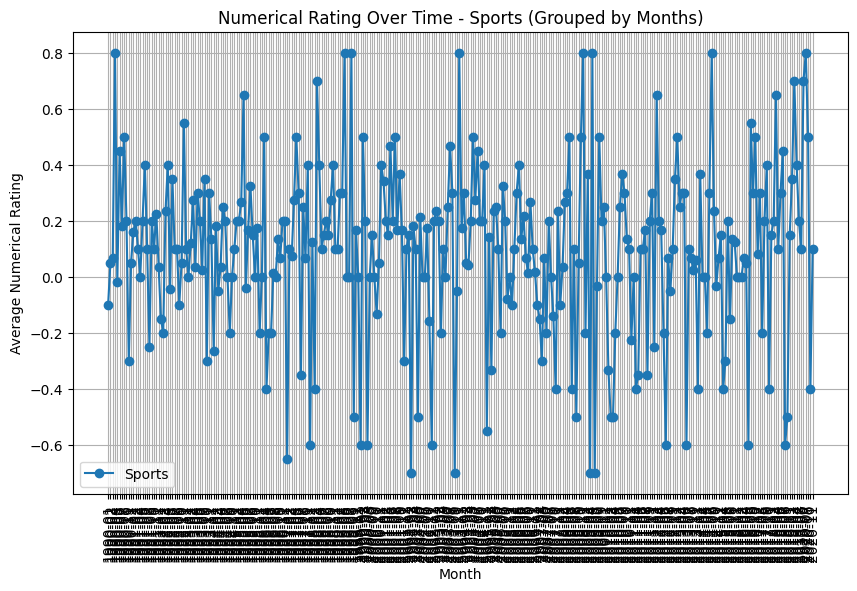

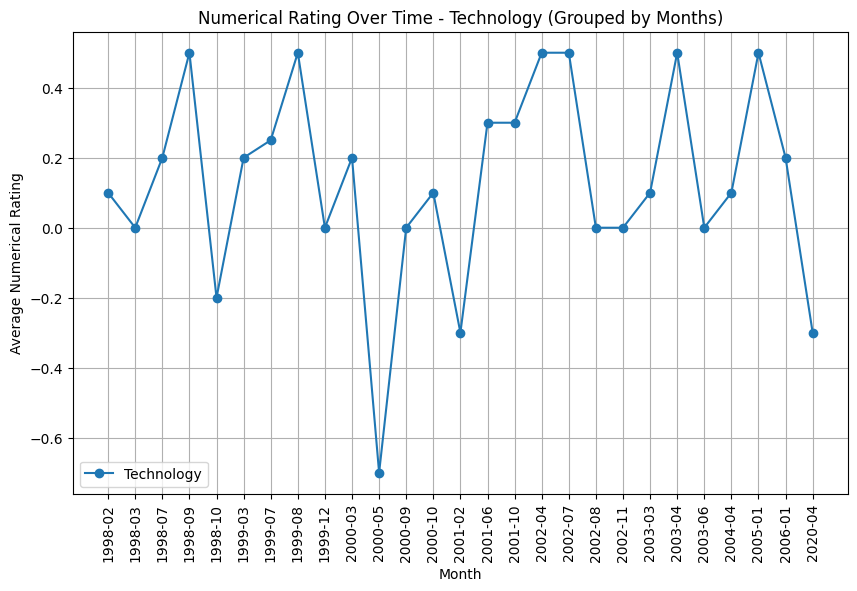

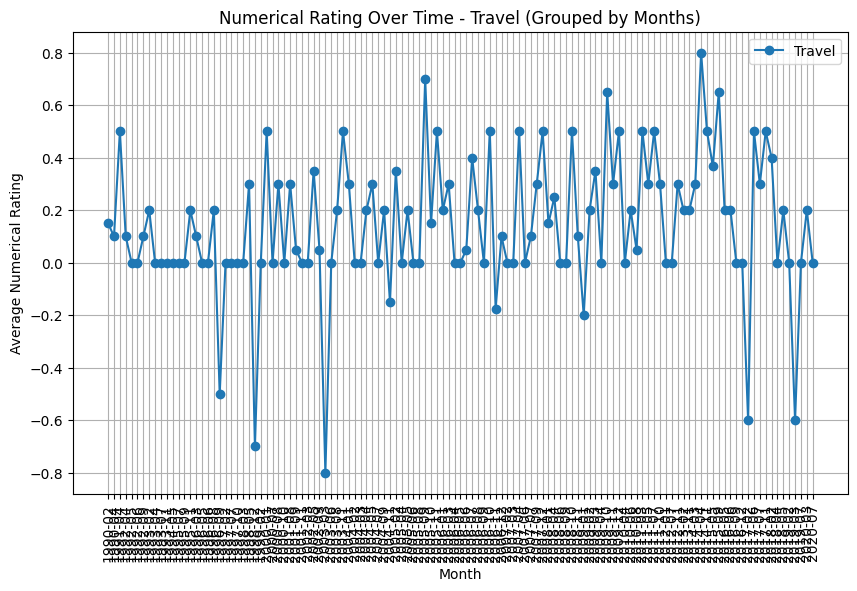

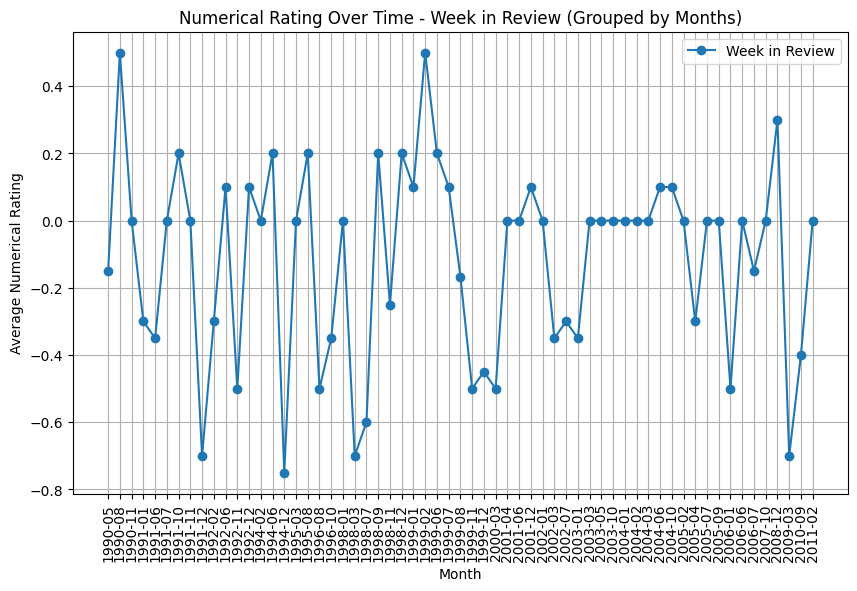

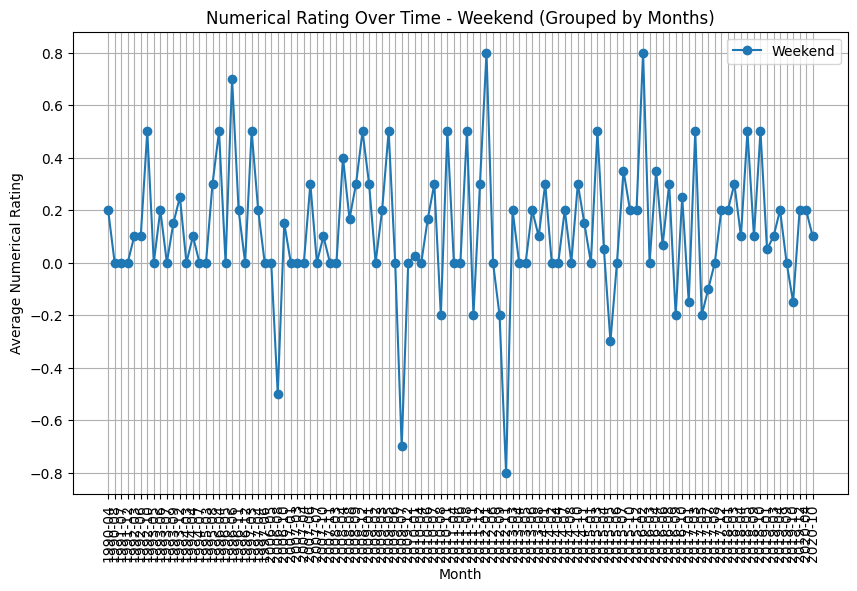

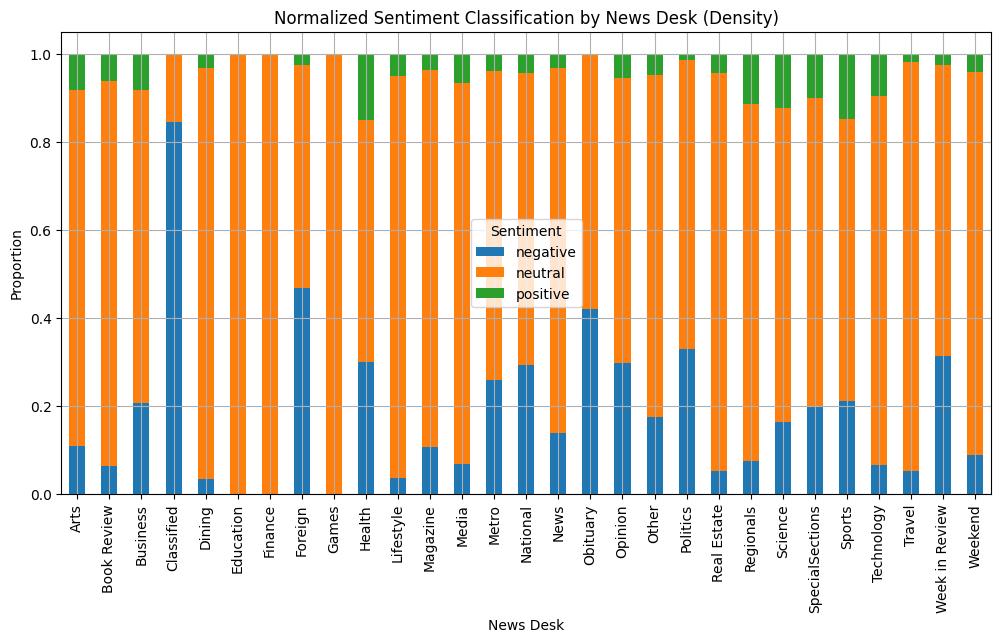

In [ ]:
import matplotlib.pyplot as plt

# Ensure pub_date is datetime type
current_df_retry_final = pd.read_csv("/content/drive/My Drive/NYT_data/current_df_retry_final.csv")
current_df_retry_final['pub_date'] = pd.to_datetime(current_df_retry_final['pub_date'])

# Group by month
current_df_retry_final['month'] = current_df_retry_final['pub_date'].dt.to_period('M')

# Numerical rating over time (grouped by months)
rating_over_time = current_df_retry_final.groupby('month')['numerical rating'].mean().reset_index()

# Sentiment classification over time (grouped by months)
sentiment_classification_over_time = current_df_retry_final.groupby(['month', 'sentiment classification']).size().unstack(fill_value=0)

# Numerical rating by news desk (grouped by months)
rating_by_news_desk = current_df_retry_final.groupby(['news_desk', 'month'])['numerical rating'].mean().reset_index()

# Sentiment classification by news desk
sentiment_by_news_desk = current_df_retry_final.groupby(['news_desk', 'sentiment classification']).size().unstack(fill_value=0)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(current_df_retry_final['word_count'], current_df_retry_final['numerical rating'], alpha=0.7, label="Data Points")

# Calculate the best-fit line
x = current_df_retry_final['word_count']
y = current_df_retry_final['numerical rating']
fit_params = np.polyfit(x, y, 1)
fit_line = np.poly1d(fit_params)

# Overlay the best-fit line
plt.plot(
    x,
    fit_line(x),
    color="red",
    label=f"Best-Fit Line (y = {fit_params[0]:.2f}x + {fit_params[1]:.2f})"
)

# Formatting the plot
plt.title('Scatter Plot of Word Count vs Numerical Rating with Best-Fit Line')
plt.xlabel('Word Count')
plt.ylabel('Numerical Rating')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Ensure month column is in datetime format for plotting
rating_over_time['month'] = pd.to_datetime(rating_over_time['month'].astype(str))

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rating_over_time['month'], rating_over_time['numerical rating'], alpha=0.7, label="Data Points")

# Calculate the best-fit line
x = rating_over_time['month'].map(lambda date: date.toordinal())
y = rating_over_time['numerical rating']
fit_params = np.polyfit(x, y, 1)
fit_line = np.poly1d(fit_params)

# Overlay the best-fit line
plt.plot(
    rating_over_time['month'],
    fit_line(x),
    color="red",
    label=f"Best-Fit Line (y = {fit_params[0]:.2f}x + {fit_params[1]:.2f})"
)

# Formatting the plot
plt.title('Numerical Rating Over Time (Scatter with Best-Fit Line)')
plt.xlabel('Month')
plt.ylabel('Average Numerical Rating')
plt.grid(True)
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


# Normalize sentiment classification counts over time (grouped by months)
sentiment_classification_over_time_normalized = sentiment_classification_over_time.div(sentiment_classification_over_time.sum(axis=1), axis=0)

# Plot the normalized data
sentiment_classification_over_time_normalized.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Normalized Sentiment Classification Over Time (Density)')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()


#Per news desk: Line chart of ratings (grouped by months)
for desk in rating_by_news_desk['news_desk'].unique():
    desk_data = rating_by_news_desk[rating_by_news_desk['news_desk'] == desk]
    plt.figure(figsize=(10, 6))
    plt.plot(desk_data['month'].astype(str), desk_data['numerical rating'], marker='o', linestyle='-', label=f'{desk}')
    plt.title(f'Numerical Rating Over Time - {desk} (Grouped by Months)')
    plt.xlabel('Month')
    plt.ylabel('Average Numerical Rating')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.show()

# Normalize sentiment classification counts by news desk
sentiment_by_news_desk_normalized = sentiment_by_news_desk.div(sentiment_by_news_desk.sum(axis=1), axis=0)

# Plot the normalized data
sentiment_by_news_desk_normalized.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Normalized Sentiment Classification by News Desk (Density)')
plt.xlabel('News Desk')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()


Based on the various graphs, it seems that headline sentiment proportions for news desks seem to vary, and there does not seem to be defining pattern for headline sentiment over time as well. It may be helpful to increase the sample size to gain a stronger understanding of trends over time.

##News Desk Classification


We trained an LDA classifier to predict news desk classification based on the article headlines. Using sklearn’s CountVectorizer, we converted article headlines into embeddings, allowing us to train a random forest model using an LDA transformer to predict news desks.


In [ ]:
# Use Latent Dirichlet Allocation modeling, training and test split, 5-fold cross validation, and gridsearch over parameters.
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer

# Preprocess the text data
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove special characters and lowercase
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Drop rows where 'headline' or 'news_desk' is NaN or empty
df1 = df1.dropna(subset=['headline', 'news_desk'])  # Remove rows with NaN in these columns
df1 = df1[df1['headline'].str.strip() != '']       # Remove rows with empty strings in 'headline'
df1 = df1[df1['news_desk'].str.strip() != '']      # Remove rows with empty strings in 'news_desk'

# Filter out rows with 'news_desk' values that occur fewer than 1000 times
news_desk_counts = df1['news_desk'].value_counts()
valid_news_desks = news_desk_counts[news_desk_counts >= 1000].index
df1 = df1[df1['news_desk'].isin(valid_news_desks)]

# Subsample 1% of the data
sample_df1 = df1.sample(frac=0.01, random_state=109)

# Apply preprocessing to the titles column only on the subsample
sample_df1['processed_title'] = sample_df1['headline'].apply(preprocess_text)

# Create stratified train-test split on the subsample
X_sample = sample_df1['processed_title']
y_sample = sample_df1['news_desk']
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample, y_sample, test_size=0.5, stratify=y_sample, random_state=109
)

# Define pipeline with a CountVectorizer, LDA for topic modeling, and a Random Forest classifier
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer to integrate LDA into the pipeline
class LDATransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=5):
        self.n_components = n_components
        self.lda_model = None
        self.vectorizer = None

    def fit(self, X, y=None):
        self.vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
        dtm = self.vectorizer.fit_transform(X)
        self.lda_model = LatentDirichletAllocation(n_components=self.n_components, random_state=109)
        self.lda_model.fit(dtm)
        return self

    def transform(self, X):
        dtm = self.vectorizer.transform(X)
        topic_distributions = self.lda_model.transform(dtm)
        return topic_distributions

pipeline = Pipeline([
    ('lda', LDATransformer()),
    ('clf', RandomForestClassifier(random_state=109))
])

# Grid search
param_grid = {
    'lda__n_components': [5, 10, 15],
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [5, 10, 20, 50]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search.fit(X_train_sample, y_train_sample)

# Display best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_sample)

print("Test Accuracy:", accuracy_score(y_test_sample, y_pred))
# print("\nClassification Report:\n", classification_report(y_test_sample, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'clf__max_depth': 20, 'clf__n_estimators': 100, 'lda__n_components': 10}
Best Cross-Validation Score: 0.2760054533060668
Test Accuracy: 0.2710974778459441


#Results

### Evaluation Metrics
The GPT model’s performance was evaluated using:
- **Accuracy**: Overall percentage of correct sentiment predictions.
- **F1-Score**: A balance between precision and recall, particularly useful for handling imbalanced classes.

###Model Results
The gradient boosting model resulted in accuracy and F1 scores of 1. The model also had an MSE of 0 by the third round of training, which implies a high degree of overfitting. However, this may be due to the strength of the Chat GPT classifications, as we are simply testing on Chat GPT's own evaluations.

###Reclassification of Headlines With New Thresholds
We derived negative/neutral and neutral/positive thresholds through GMM (Gaussian Mixture Model) and K-Means, where The GMM and K-Means produced approximately 82.7% and 99.7% accuracy, respectively.

The resulting model demonstrated strong performance, accurately capturing the sentiment of headlines while benefiting from GPT's contextual understanding of language.

#Conclusion and Further Improvement

## Areas of Improvement

In this project, we identified several opportunities for improvement that could enhance the accuracy, scope, and insights of our analysis.

### 1. **Alternative NLP Models**
While we used ChatGPT for sentiment classification, other powerful NLP models like BERT or VADER could improve sentiment analysis by capturing nuanced language and avoiding potential biases introduced when using the same model for both classification and evaluation.

### 2. **Adjust Word Choice**
Filtering specific words can help refine the analysis:
- **Focus on words that are not frequent** in the dataset but have a **high average sentiment score**.
- By identifying less common but impactful words, we can uncover strong sentiment signals that may be overlooked in high-frequency terms.

This approach would provide deeper insights into specific language choices and highlight key sentiment-driving words in the headlines.

### 3. **Article Scraping**
Currently, our analysis is limited to **headlines only**. Expanding the dataset to include full articles would offer richer insights:
- **Web scraping** additional text from linked articles would allow us to:
   - Analyze the full context of articles instead of just headlines.
   - Extract deeper sentiment trends and identify how tone and sentiment evolve throughout the content.

This extension would enable a more comprehensive understanding of **how news content evolves** over time, providing stronger analytical results.


#Appendix Code

In [ ]:
api_key = "API_KEY"

In [ ]:
#installing latest version of openai
import os
import openai
import numpy as np
from openai import OpenAI

# Initialize the OpenAI client
client = OpenAI(api_key=api_key)


# Prepopulate columns with NaNs
current_df_retry = df1.sample(n=10000, random_state=109)
current_df_retry['numerical rating'] = np.nan
current_df_retry['sentiment classification'] = np.nan

# Iterate through rows
for index, row in current_df_retry.iterrows():
    headline = row['headline']

    regression_message = f"""For the following headline,
we want to give it a sentiment rating from -1
(most negative) to 1 (most positive). For the output, only return a float between -1 and 1.
Assume 0 is neutral. The headline is as follows: {headline} """

    classification_message = f"""For the following dataframe,
we want to take each headline and classify it as either "positive", "negative",
or "neutral". The output should NOT be a sentence and should only
be exactly one word: "positive", "negative", or "neutral".
The headline is as follows: {headline} """

    # Retry loop for regression
    for attempt in range(3):
        regression_response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "user", "content": regression_message}
            ]
        )
        try:
            numerical_rating = float(regression_response.choices[0].message.content)
            if -1 <= numerical_rating <= 1:
                break
        except ValueError:
            numerical_rating = np.nan
        if attempt == 2:
            print(f"Failed to get a valid numerical rating for headline: {headline}")

    # Retry loop for classification
    for attempt in range(3):
        classification_response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "user", "content": classification_message}
            ]
        )
        label = classification_response.choices[0].message.content.strip().lower()
        if label in ["positive", "negative", "neutral"]:
            break
        if attempt == 2:
            print(f"Failed to get a valid sentiment classification for headline: {headline}")
            label = "neutral"

    # Add these variables to DataFrame
    current_df_retry.at[index, 'numerical rating'] = numerical_rating
    current_df_retry.at[index, 'sentiment classification'] = label

    # Save progress every 1000 rows
    if index % 1000 == 0 and index > 0:
        checkpoint_file = f'current_df_retry_checkpoint_{index}.csv'
        current_df_retry.to_csv(checkpoint_file, index=False)
        print(f"Progress saved to {checkpoint_file} at row {index}")

# Final save
current_df_retry.to_csv('current_df_retry_final.csv', index=False)
print("Final DataFrame saved to current_df_retry_final.csv")


<ipython-input-8-57e44bbf649a>:65: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'neutral' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  current_df_retry.at[index, 'sentiment classification'] = label


Progress saved to current_df_retry_checkpoint_1174000.csv at row 1174000
Progress saved to current_df_retry_checkpoint_1304000.csv at row 1304000
Progress saved to current_df_retry_checkpoint_2657000.csv at row 2657000
Progress saved to current_df_retry_checkpoint_860000.csv at row 860000


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}